### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We need to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

#### Business Goal

Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


### Import the Libraries

In [867]:
# import libraries for importing the dataset
import pandas as pd
import numpy as np

# import libraries for visualising the data
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries to split the dataset into train data and test data
import sklearn
from sklearn.model_selection import train_test_split

# import libraries for rescaling the features
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# import library to create linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE


# import stats to check skew and kurtosis
from scipy import stats

# import library to ignore the warnings 
import warnings
warnings.filterwarnings('ignore')

# To display the max rows and columns
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',200)

In [868]:
#import the dataset
houses = pd.read_csv('train.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [869]:
#Check the shape of the dataset
houses.shape

(1460, 81)

In [870]:
#Check the datatypes and missing values in the dataset
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [871]:
#Check the missing values in the dataset
houses.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [872]:
# Check the percentage of missing values in the dataset
round(100*((houses.isnull().sum())/houses.shape[0]).sort_values(ascending=False),2)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [873]:
#Delete the columns which are having >50% missing values
houses = houses.loc[:,100*((houses.isnull().sum())/len(houses))<50]
houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [874]:
#Check the shape of the dataset after deleting the columns which has >50% missing values
houses.shape

(1460, 77)

In [875]:
#Check the percentage of missing values
round(100*((houses.isnull().sum())/len(houses)).sort_values(ascending=False),2)

FireplaceQu      47.26
LotFrontage      17.74
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
KitchenQual       0.00
BsmtFullBath      0.00
GrLivArea         0.00
TotRmsAbvGrd      0.00
Functional        0.00
Id                0.00
Fireplaces        0.00
ScreenPorch       0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
MiscVal           0.00
PoolArea          0.00
3SsnPorch         0.00
2ndFlrSF          0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
PavedDrive        0.00
GarageArea        0.00
GarageCars        0.00
LowQualFinSF      0.00
Heating    

In [876]:
# retriving the columns which has any null values
houses_cols = houses.columns[houses.isnull().any()]
round((100*houses[houses_cols].isnull().sum()/len(houses)).sort_values(ascending=False),2)

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [877]:
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- We can replace the null values of categorical columns with Mode but in this case, after analysing the dataset it is better to impute the missing values with None. Below are the categorical columns which are having missing/null values -"FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1","MasVnrType","Electrical"

In [878]:
cat_nul_cols = ["FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1","MasVnrType","Electrical"]
for col in cat_nul_cols:
    houses[col].fillna("None", inplace=True)

In [879]:
#Calculate the Age of the house 
houses['AgeOfHouse'] = houses['YrSold'] - houses['YearBuilt']

- drop the columns YrSold, YearBuilt as we have derived age of the property by using thes variables.
- Also drop Id which has unique values.
- Drop GarageYrBlt, YearRemodAdd, MoSold as they are irrelevant for analysis

In [880]:
#Drop the columns which are irrelevant
houses.drop(['Id','YrSold','YearBuilt','GarageYrBlt','YearRemodAdd','MoSold'], axis=1, inplace=True)

- Convert numerical columns (MSSubClass, OverallQual, OverallCond) to categorical columns as they represent values in numbers but they are actually categorical in nature.

In [881]:
# Converting column type for categorical variable from numeric to object
houses['MSSubClass'] = houses['MSSubClass'].astype('object')
houses['OverallQual'] = houses['OverallQual'].astype('object')
houses['OverallCond'] = houses['OverallCond'].astype('object')

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


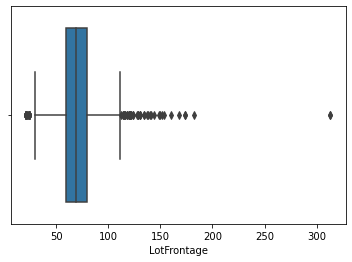

Mean of LotFrontage: 70.04995836802665
Median of LotFrontage: 69.0
Missing values in LotFrontage: 0


In [882]:
# Imputing the missing values for LotFrontage
# Check the minimum, maximum, 25%, 50%, 75%
print(houses.LotFrontage.describe())

#Plot the Boxplot for LotFrontage to check the outliers 
sns.boxplot(houses.LotFrontage)
plt.show()

#Finding the mean, median of LotFrontage
LotFrontage_Mean=houses.LotFrontage.mean()
print('Mean of LotFrontage:',LotFrontage_Mean)
LotFrontage_Median=houses.LotFrontage.median()
print('Median of LotFrontage:',LotFrontage_Median)

#Imputing the missing values with Median as there are outliers for LotFrontage
houses.LotFrontage.fillna(LotFrontage_Median, inplace=True)

# After imputing the missing values with median, check the missing values of LotFrontage in DataSet
print('Missing values in LotFrontage:',houses.LotFrontage.isnull().sum())

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


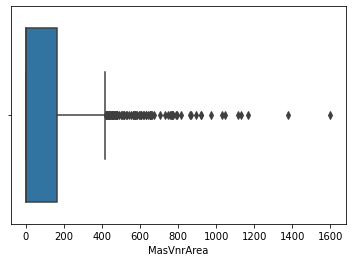

Mean of MasVnrArea: 103.68526170798899
Median of MasVnrArea: 0.0
Missing values in MasVnrArea: 0


In [883]:
# Imputing the missing values for MasVnrArea
# Check the minimum, maximum, 25%, 50%, 75%
print(houses.MasVnrArea.describe())

#Plot the Boxplot for MasVnrArea to check the outliers 
sns.boxplot(houses.MasVnrArea)
plt.show()

#Finding the mean, median of MasVnrArea
MasVnrArea_Mean=houses.MasVnrArea.mean()
print('Mean of MasVnrArea:',MasVnrArea_Mean)
MasVnrArea_Median=houses.MasVnrArea.median()
print('Median of MasVnrArea:',MasVnrArea_Median)

#Imputing the missing values with Median as there are outliers for MasVnrArea
houses.MasVnrArea.fillna(MasVnrArea_Median, inplace=True)

# After imputing the missing values with median, check the missing values of MasVnrArea in DataSet
print('Missing values in MasVnrArea:',houses.MasVnrArea.isnull().sum())

In [884]:
#Check the percentage of missing values
round((100*houses.isnull().sum()/len(houses)).sort_values(ascending=False),2)

MSSubClass       0.0
MSZoning         0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
3SsnPorch        0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
EnclosedPorch    0.0
GarageCars       0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
LandSlope        0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LotConfig        0.0
RoofStyle        0.0
Utilities    

In [885]:
#Numeric variables in dataset
houses_num = list(houses.select_dtypes(include=['float64', 'int64']).columns)
houses_num

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'AgeOfHouse']

In [886]:
#Categorical variables in dataset
houses_cat = list(houses.select_dtypes(include='object').columns)
houses_cat

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

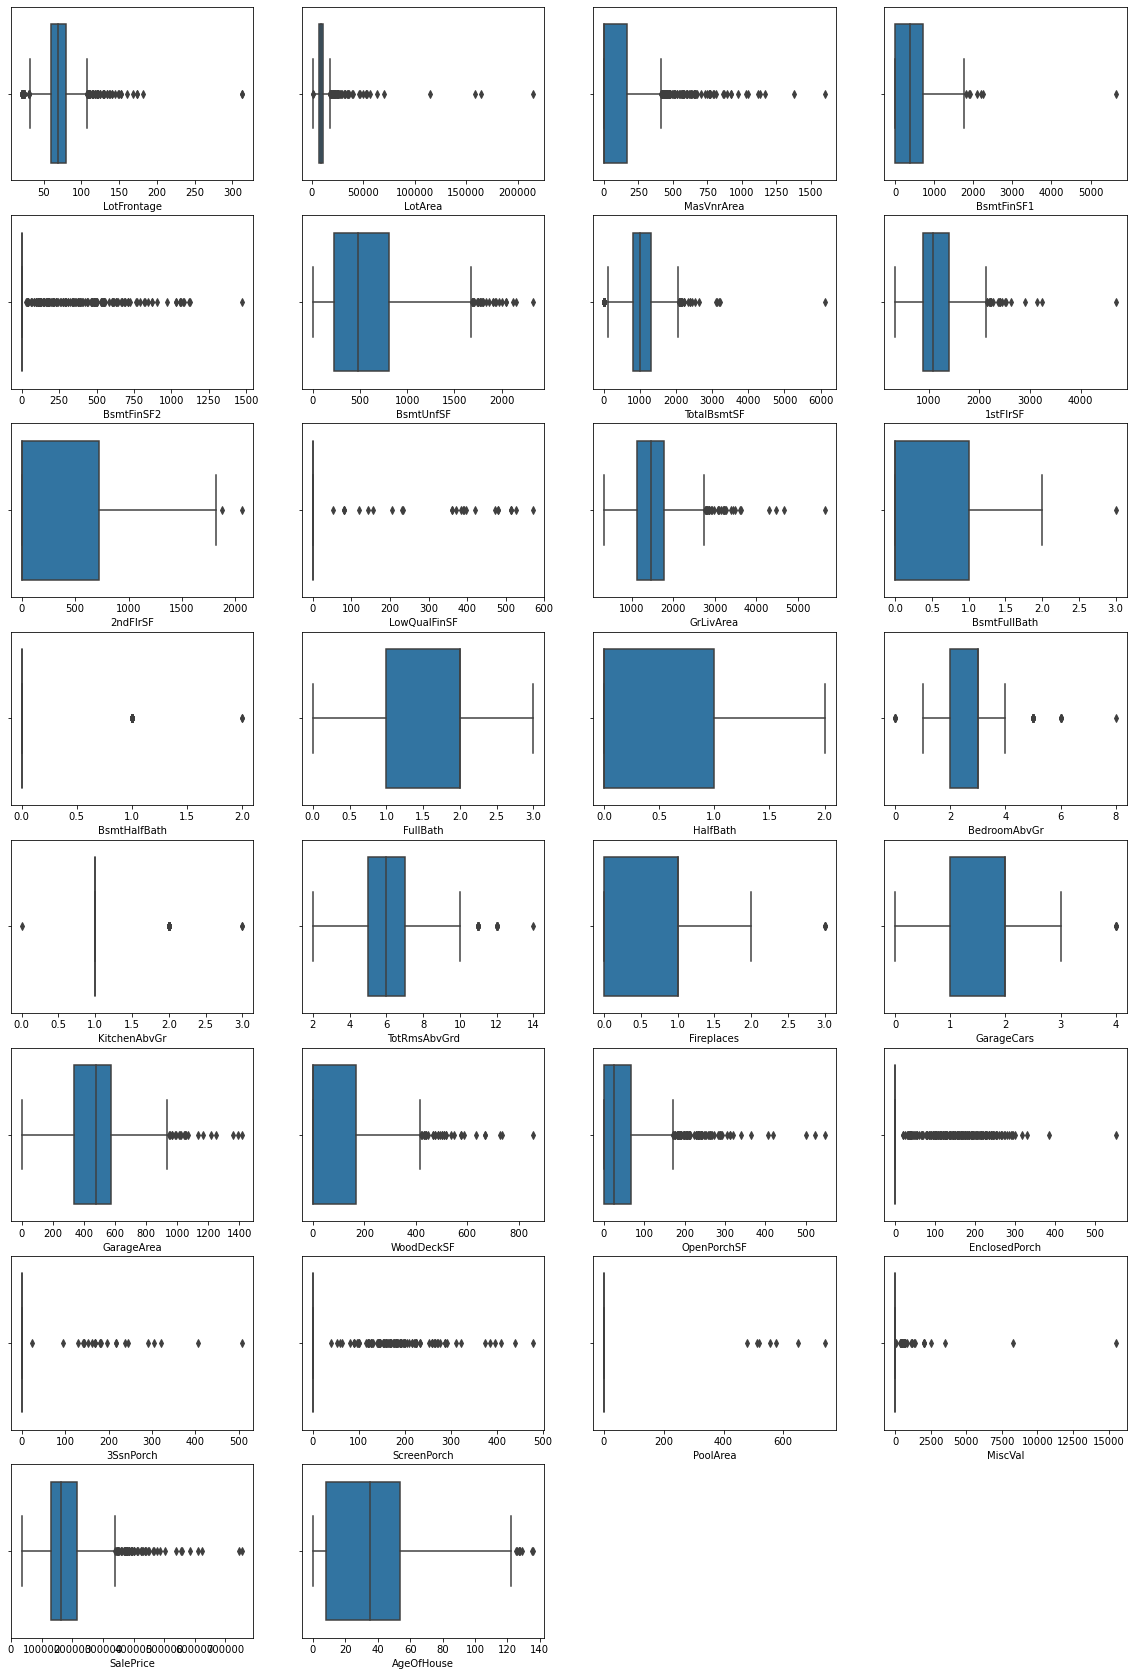

In [887]:
# Plotting the spread of the numeric columns
plt.figure(figsize=(20,30))
for i in enumerate(houses_num):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=houses)

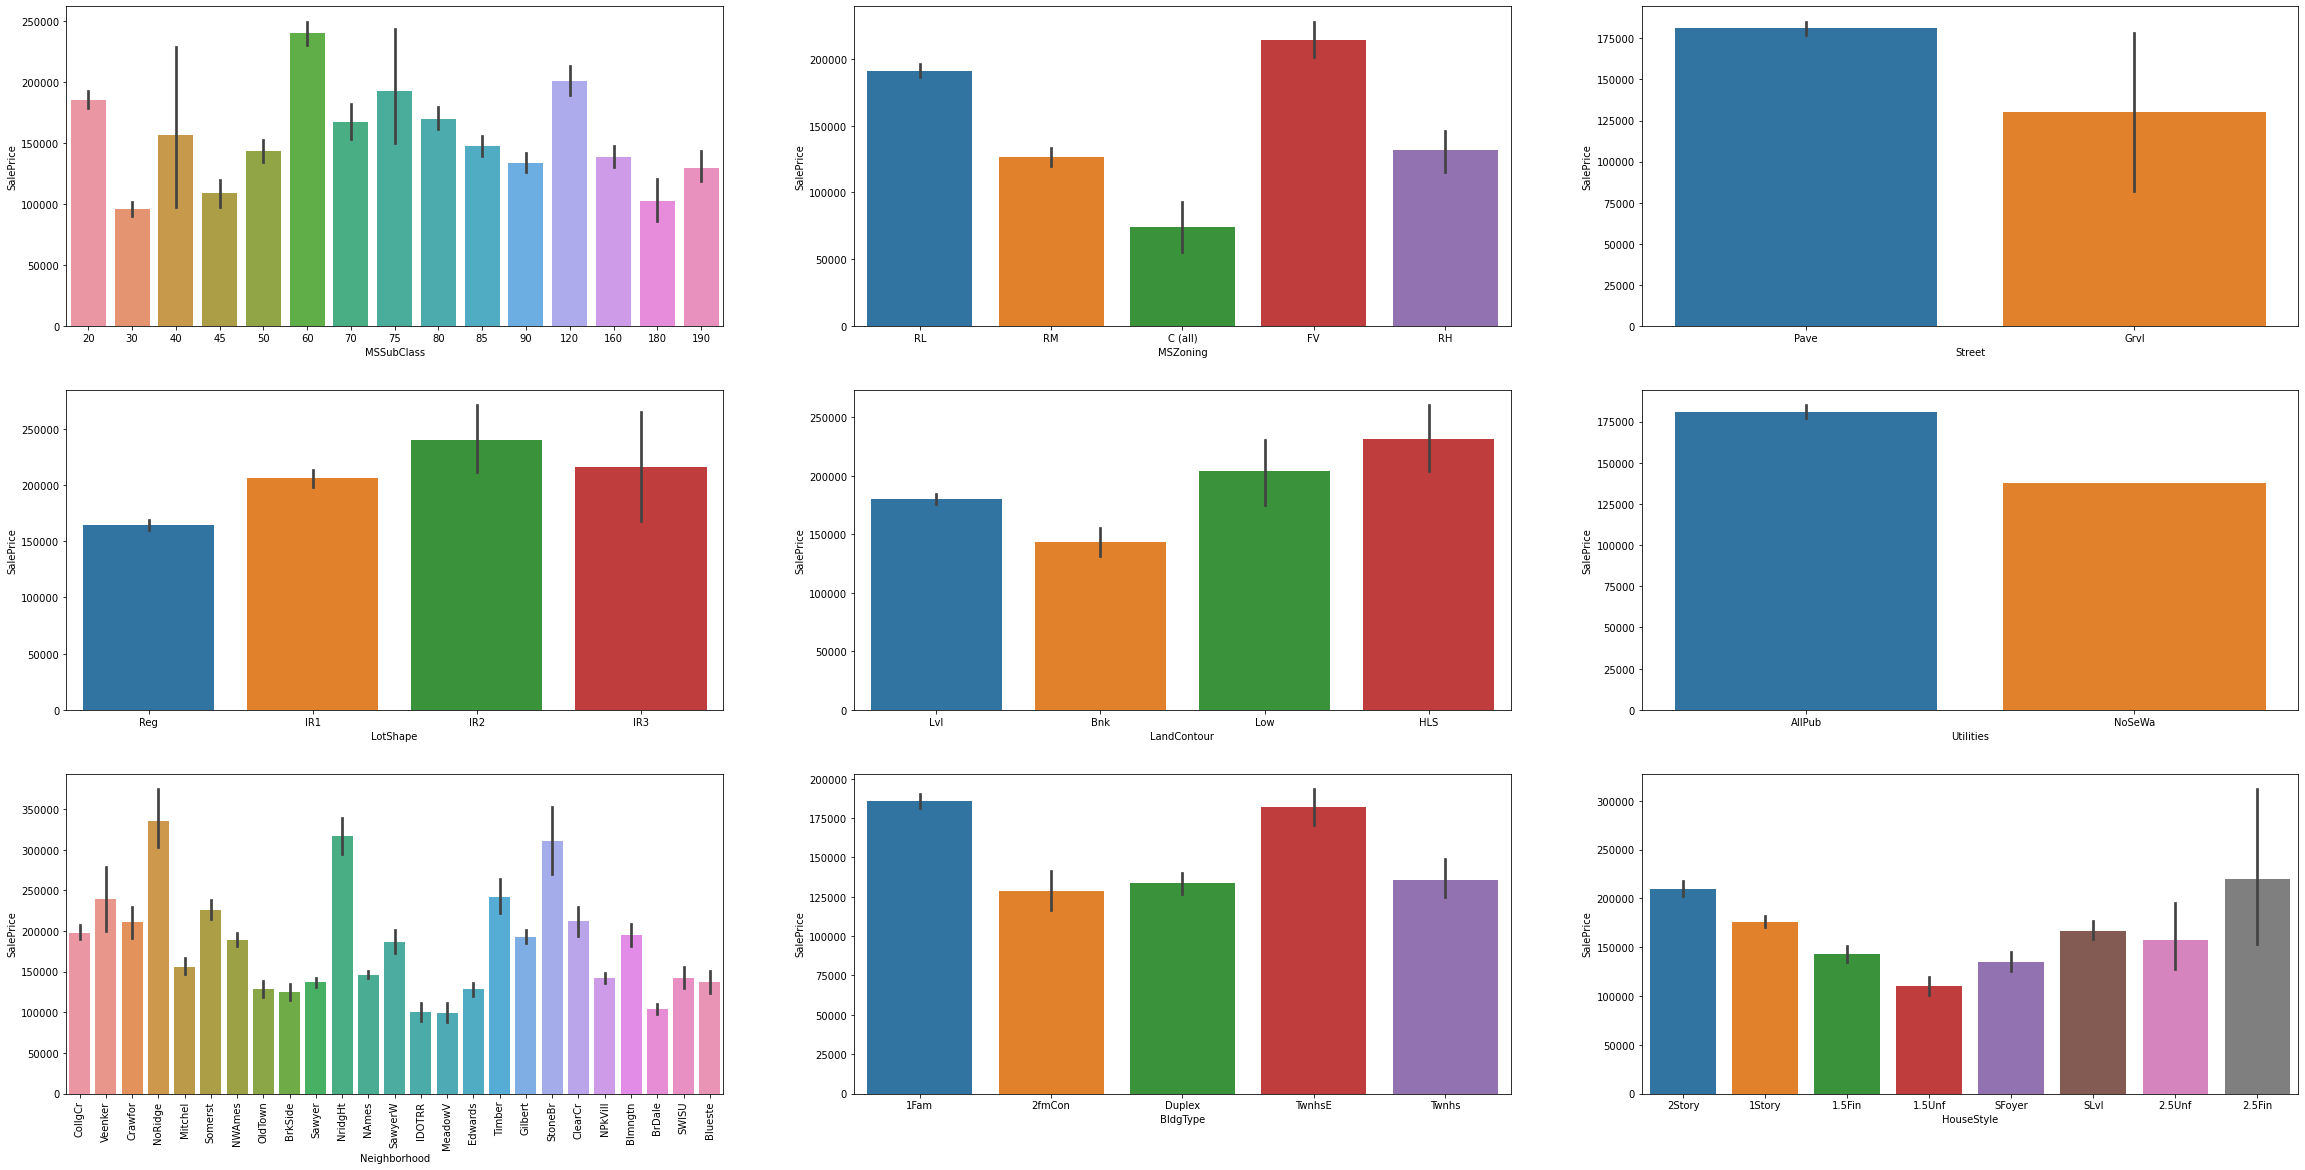

In [888]:
#Plotting the categorical variables against SalePrice variable

plt.figure(figsize=(40,20))

plt.subplot(3,3,1)
sns.barplot(x = 'MSSubClass', y = 'SalePrice', data= houses)

plt.subplot(3,3,2)
sns.barplot(x = 'MSZoning', y = 'SalePrice', data= houses)

plt.subplot(3,3,3)
sns.barplot(x = 'Street', y = 'SalePrice', data= houses)

plt.subplot(3,3,4)
sns.barplot(x = 'LotShape', y = 'SalePrice', data= houses)

plt.subplot(3,3,5)
sns.barplot(x = 'LandContour', y = 'SalePrice', data= houses)

plt.subplot(3,3,6)
sns.barplot(x = 'Utilities', y = 'SalePrice', data= houses)

plt.subplot(3,3,7)
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data= houses)
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.barplot(x = 'BldgType', y = 'SalePrice', data= houses)

plt.subplot(3,3,9)
sns.barplot(x = 'HouseStyle', y = 'SalePrice', data= houses)


plt.show()

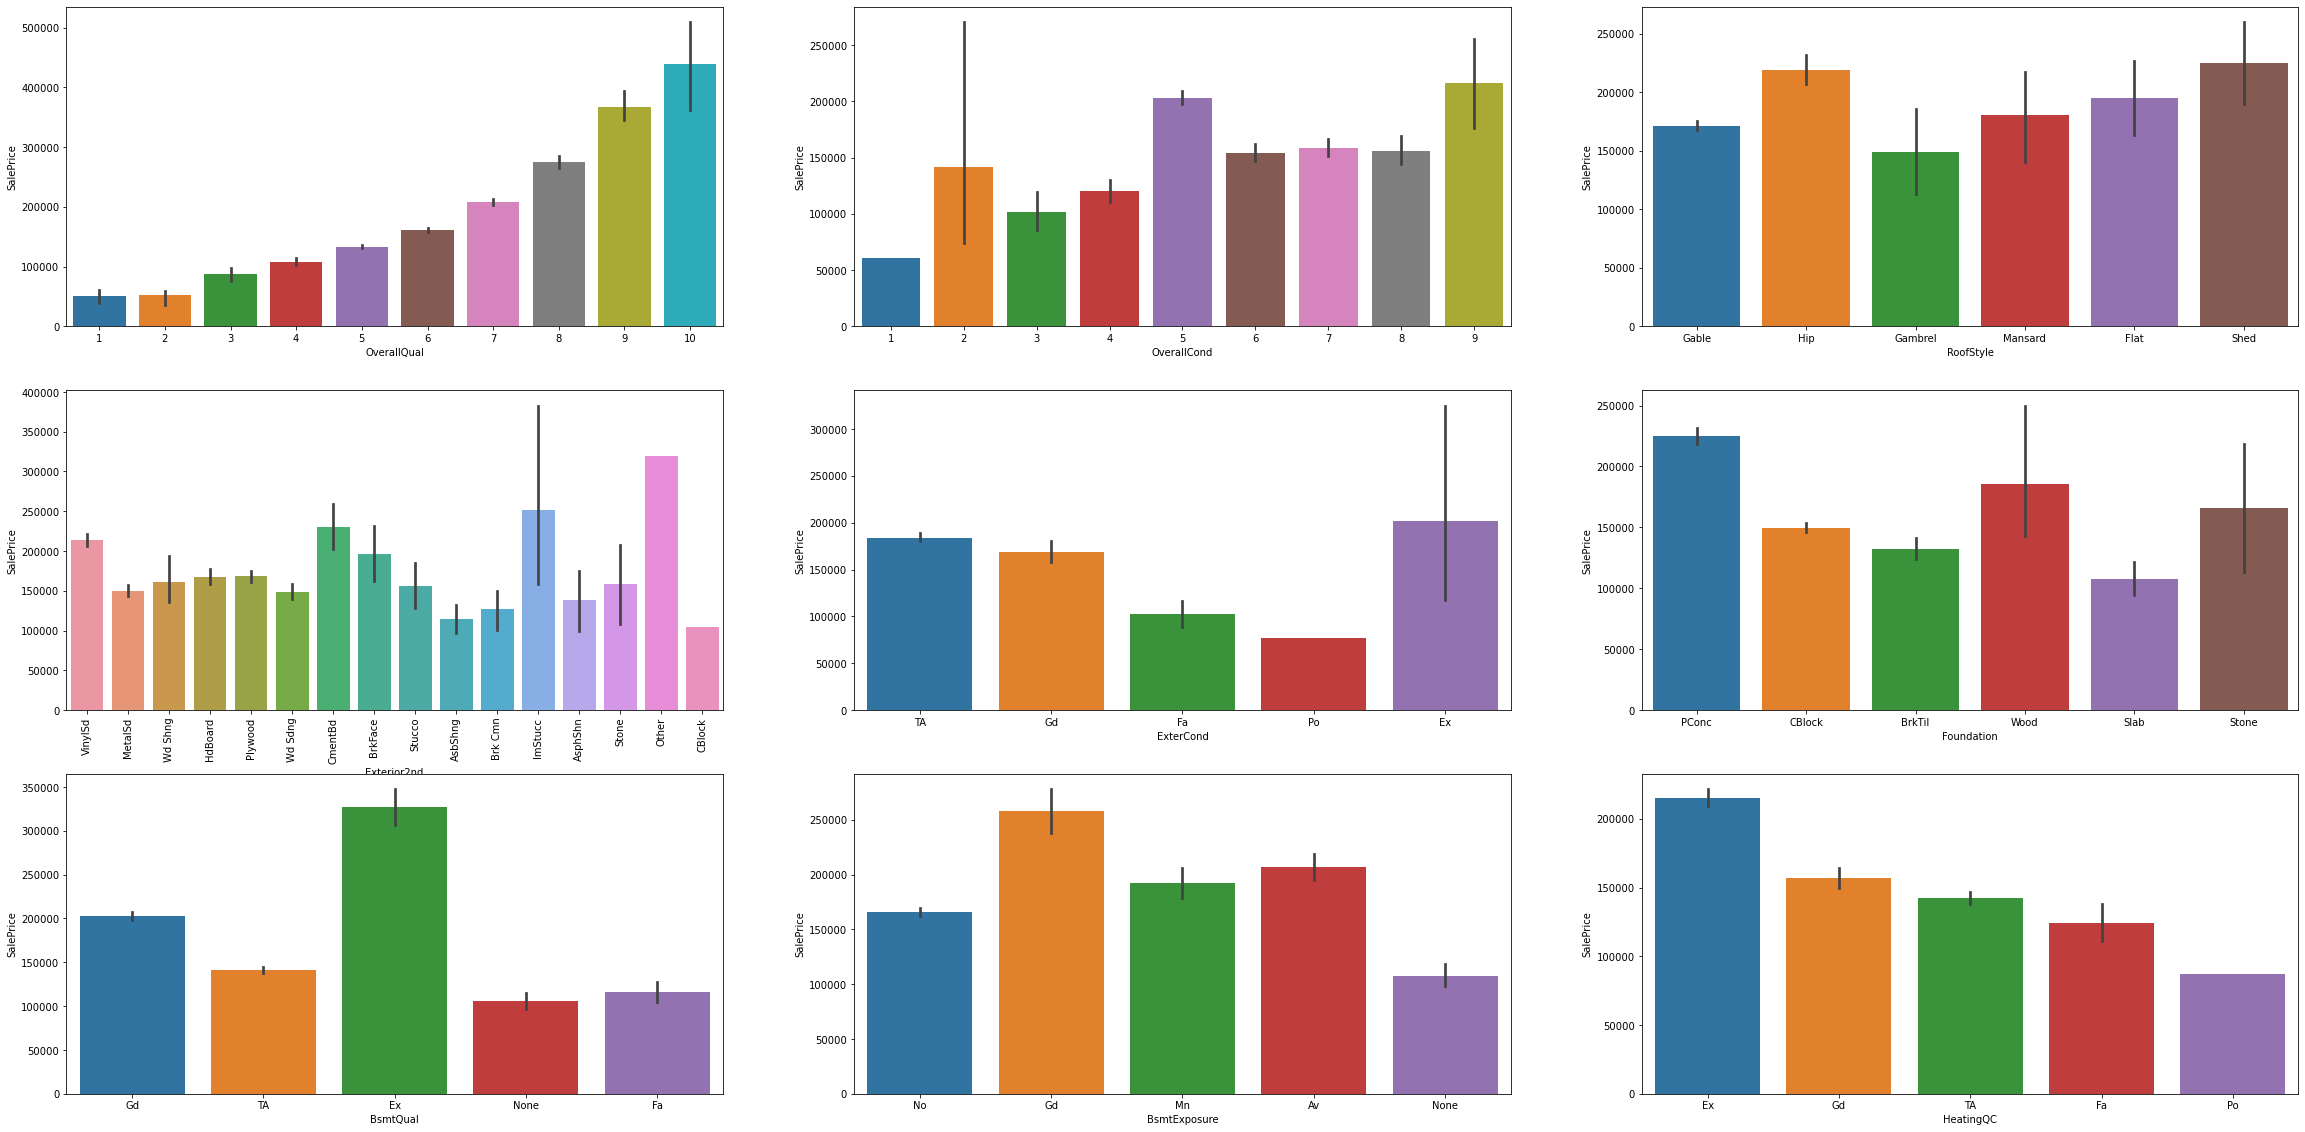

In [889]:
plt.figure(figsize=(40,20))

plt.subplot(3,3,1)
sns.barplot(x = 'OverallQual', y = 'SalePrice', data= houses)

plt.subplot(3,3,2)
sns.barplot(x = 'OverallCond', y = 'SalePrice', data= houses)

plt.subplot(3,3,3)
sns.barplot(x = 'RoofStyle', y = 'SalePrice', data= houses)

plt.subplot(3,3,4)
sns.barplot(x = 'Exterior2nd', y = 'SalePrice', data= houses)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.barplot(x = 'ExterCond', y = 'SalePrice', data= houses)

plt.subplot(3,3,6)
sns.barplot(x = 'Foundation', y = 'SalePrice', data= houses)

plt.subplot(3,3,7)
sns.barplot(x = 'BsmtQual', y = 'SalePrice', data= houses)

plt.subplot(3,3,8)
sns.barplot(x = 'BsmtExposure', y = 'SalePrice', data= houses)

plt.subplot(3,3,9)
sns.barplot(x = 'HeatingQC', y = 'SalePrice', data= houses)


plt.show()

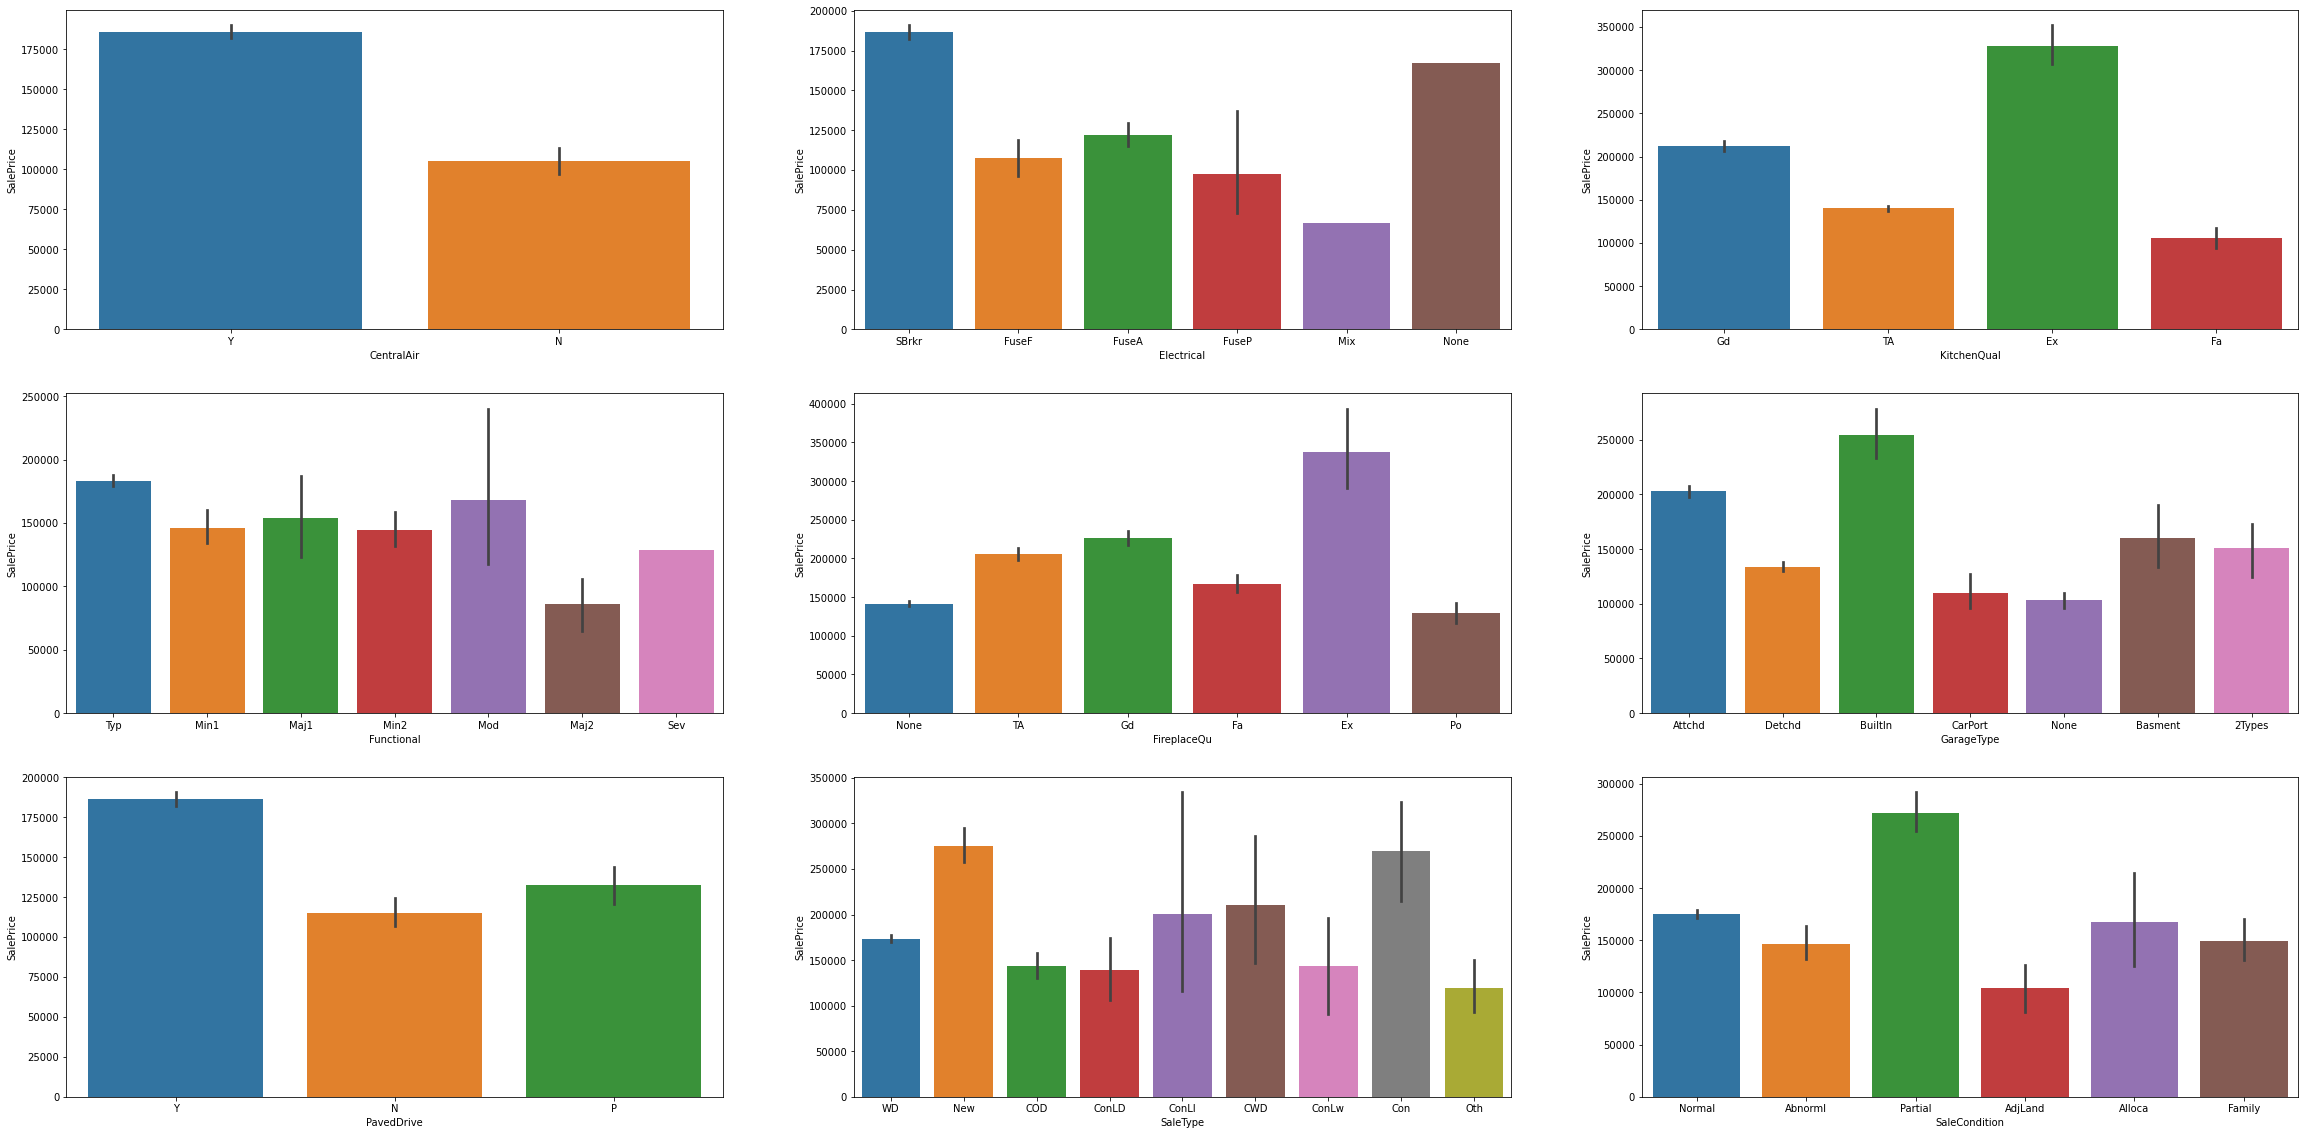

In [890]:
plt.figure(figsize=(40,20))

plt.subplot(3,3,1)
sns.barplot(x = 'CentralAir', y = 'SalePrice', data= houses)

plt.subplot(3,3,2)
sns.barplot(x = 'Electrical', y = 'SalePrice', data= houses)

plt.subplot(3,3,3)
sns.barplot(x = 'KitchenQual', y = 'SalePrice', data= houses)

plt.subplot(3,3,4)
sns.barplot(x = 'Functional', y = 'SalePrice', data= houses)

plt.subplot(3,3,5)
sns.barplot(x = 'FireplaceQu', y = 'SalePrice', data= houses)

plt.subplot(3,3,6)
sns.barplot(x = 'GarageType', y = 'SalePrice', data= houses)

plt.subplot(3,3,7)
sns.barplot(x = 'PavedDrive', y = 'SalePrice', data= houses)

plt.subplot(3,3,8)
sns.barplot(x = 'SaleType', y = 'SalePrice', data= houses)

plt.subplot(3,3,9)
sns.barplot(x = 'SaleCondition', y = 'SalePrice', data= houses)

plt.show()

#### Observations 
Highest Sale price for different categories -

1. 2-STORY 1946 & NEWER type of dwelling.
2. Floating Village Residential classification.
3. Moderately irregular shape and have paved type of road access.
4. All public Utilities (E,G,W,& S).
5. Hillside - Significant slope from side to side property.
6. Many people choose northridge and northridge heights as their neighbourhood.
7. Two and one-half story: 2nd level finished has the highest sale price among other house styles.
8. Highest Overall quality and overall condition of the house.
9. Highest prices are for Shed followed by hip types of roof.
10. Excellent condition of the material on the exterior, excellent basement quality with 100+ inches, good exposure to garden level walls, excellent heating quality and condition, excellent kitchen quality and fireplace quality has the highest price.
11. Poured Concrete type of foundation has high sales price.
12. Property which has central air conditioning has the highest sale price.
13. Standard Circuit Breakers & Romex Electrical system.
14. BuiltIn Garage has the highest sale price.
15. Home just constructed and sold type of sales have high price.
16. If the condition of the sale is partial (Home was not completed when last assessed) then it has high sale price.

In [891]:
houses.SalePrice.skew()

1.8828757597682129

In [892]:
houses.SalePrice.kurt()

6.536281860064529

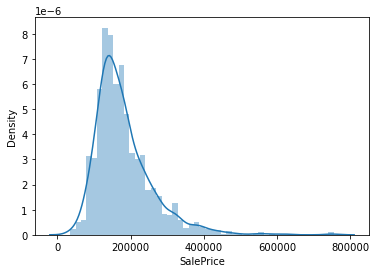

In [893]:
#Check the distribution of the target column "SalePrice"
sns.distplot(houses['SalePrice'])
plt.show()

- Seems like the distribution plot of the SalePrice column is little right skewed. 

In [894]:
#Log Transformation
houses['SalePrice']=np.log(houses['SalePrice'])

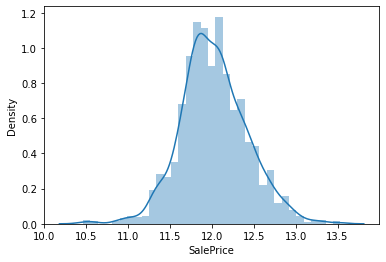

In [895]:
#After the log transformation of SalePrice, check whether the target variable is normally distributed or not
sns.distplot(houses['SalePrice'])
plt.show()

In [896]:
#Check the correlation of the dataset
num_corr = houses.select_dtypes(include=['float64', 'int64']).columns
correlation = houses[num_corr].corr()
correlation

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeOfHouse
LotFrontage,1.000000,0.304522,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.335292,-0.116223
LotArea,0.304522,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.257320,-0.014832
MasVnrArea,0.178469,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.426775,-0.311479
BsmtFinSF1,0.214367,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.372023,-0.248483
BsmtFinSF2,0.042463,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.004832,0.050422
BsmtUnfSF,0.124098,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.221985,-0.150619
TotalBsmtSF,0.363472,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.612134,-0.391498
1stFlrSF,0.413773,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.596981,-0.282143
2ndFlrSF,0.072388,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319300,-0.011552
LowQualFinSF,0.037469,0.004779,-0.068628,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185,-0.021272,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.037963,0.182228


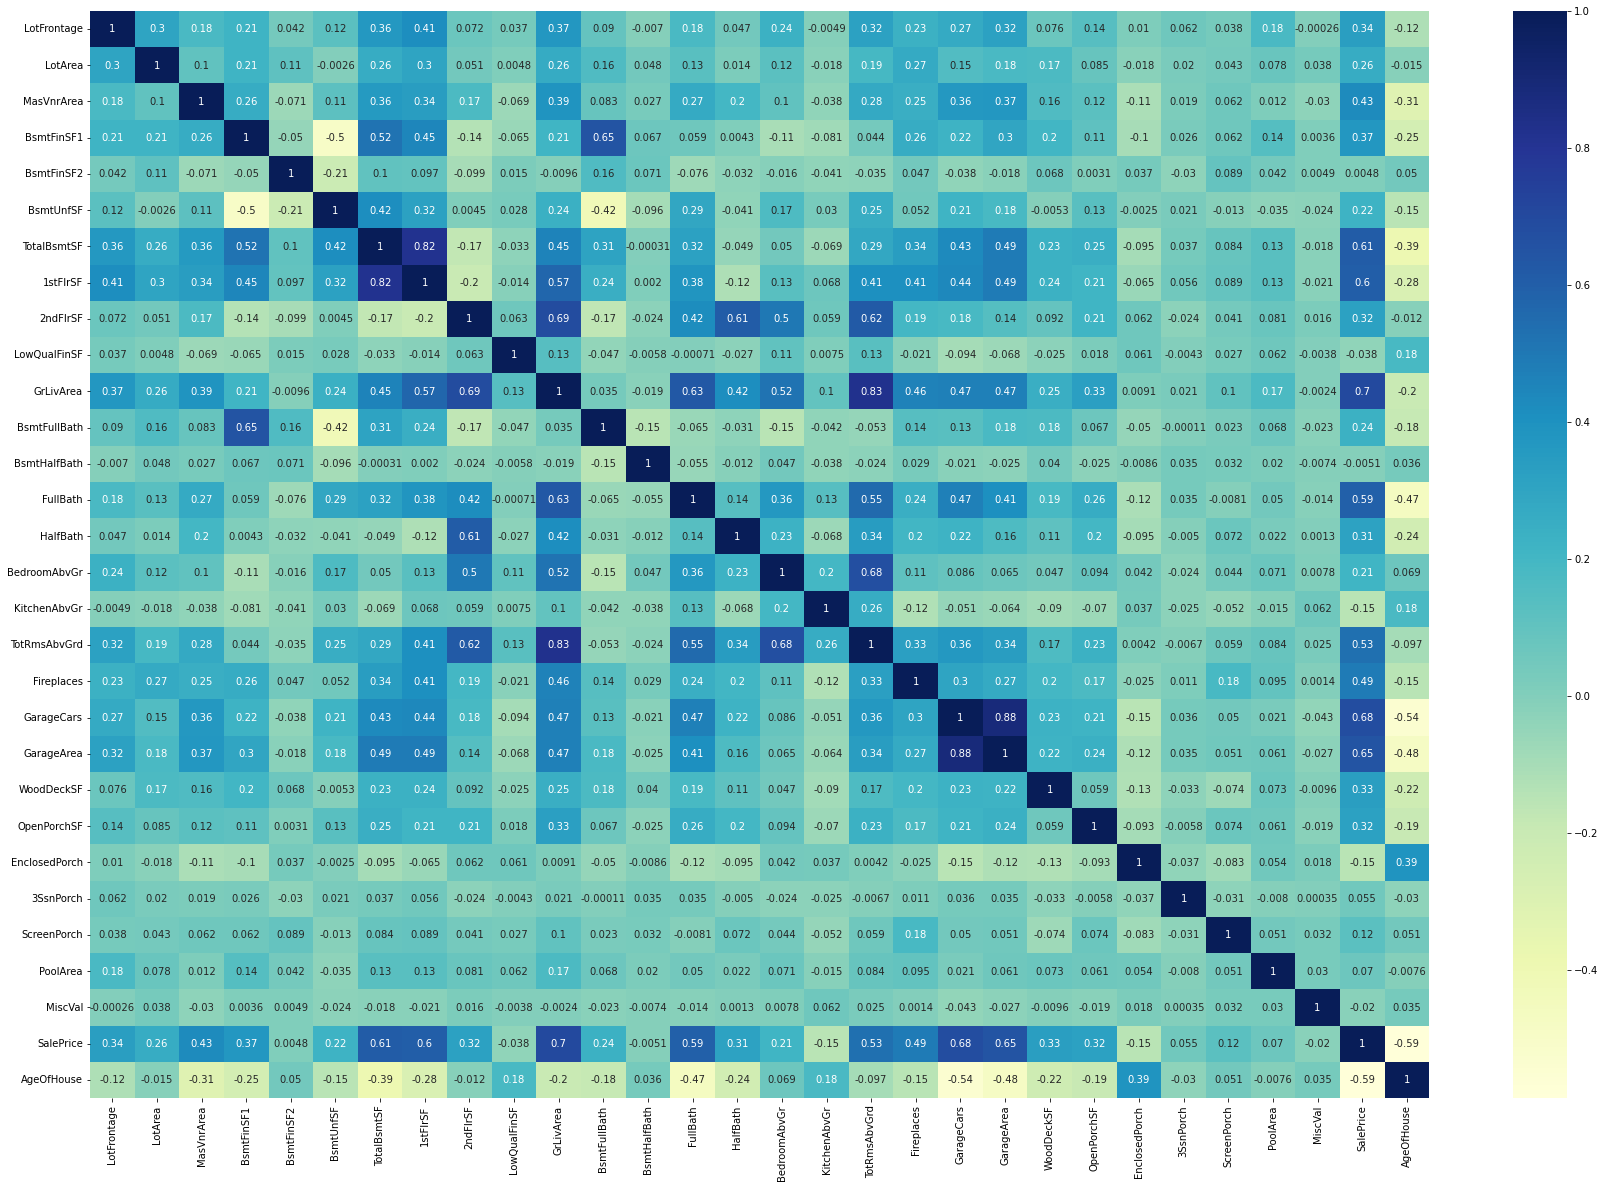

In [897]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

- Drop the variables (1stFlrSF, TotalBsmtSF, GrLivArea, TotRmsAbvGrd, GarageCars, GarageArea) as they are high correlated.

In [898]:
#Dropping the columns which are highly correlated
houses = houses.drop(['1stFlrSF', 'TotalBsmtSF','GrLivArea','TotRmsAbvGrd','GarageCars','GarageArea'],axis=1)
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,AgeOfHouse
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,854,0,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,12.247694,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,0,0,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,12.109011,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,866,0,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,12.317167,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,756,0,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,11.849398,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1053,0,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,12.429216,8


- Drop the below variables which have very low variance and thus not required for prediction
- Street, Utilities, LandContour, LandSlope, BldgType, MiscVal, RoofMatl, BsmtCond, Condition2, Heating, CentralAir, Electrical, GarageQual, GarageCond, Functional, PavedDrive, SaleType, ExterCond, BsmtFinType2

In [899]:
#We can also drop columns that show very low variance and thus not required for predictions
houses = houses.drop(['Street','Utilities','LandContour','LandSlope','BldgType','MiscVal', 'RoofMatl','BsmtCond', 'Condition2', 'Heating','CentralAir','Electrical','GarageQual', 'GarageCond', 'Functional','PavedDrive','SaleType','ExterCond','BsmtFinType2'],axis=1)
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleCondition,SalePrice,AgeOfHouse
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,Ex,854,0,1,0,2,1,3,1,Gd,0,None,Attchd,RFn,0,61,0,0,0,0,Normal,12.247694,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,Ex,0,0,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,298,0,0,0,0,0,Normal,12.109011,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,Ex,866,0,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,0,42,0,0,0,0,Normal,12.317167,7
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,Gd,756,0,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,0,35,272,0,0,0,Abnorml,11.849398,91
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,Ex,1053,0,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,192,84,0,0,0,0,Normal,12.429216,8


In [900]:
houses.shape

(1460, 47)

In [901]:
#Numerical variables
houses_numeric = houses.select_dtypes(include=['float64', 'int64']).columns
houses_numeric

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'SalePrice', 'AgeOfHouse'],
      dtype='object')

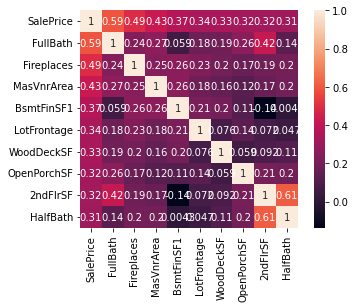

In [902]:
#Correlation matrix
#Number of variables for heatmap
k=10
cols = houses.corr().nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(houses[cols].values.T)
sns.heatmap(cm,annot=True, square=True,cbar= True, annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()


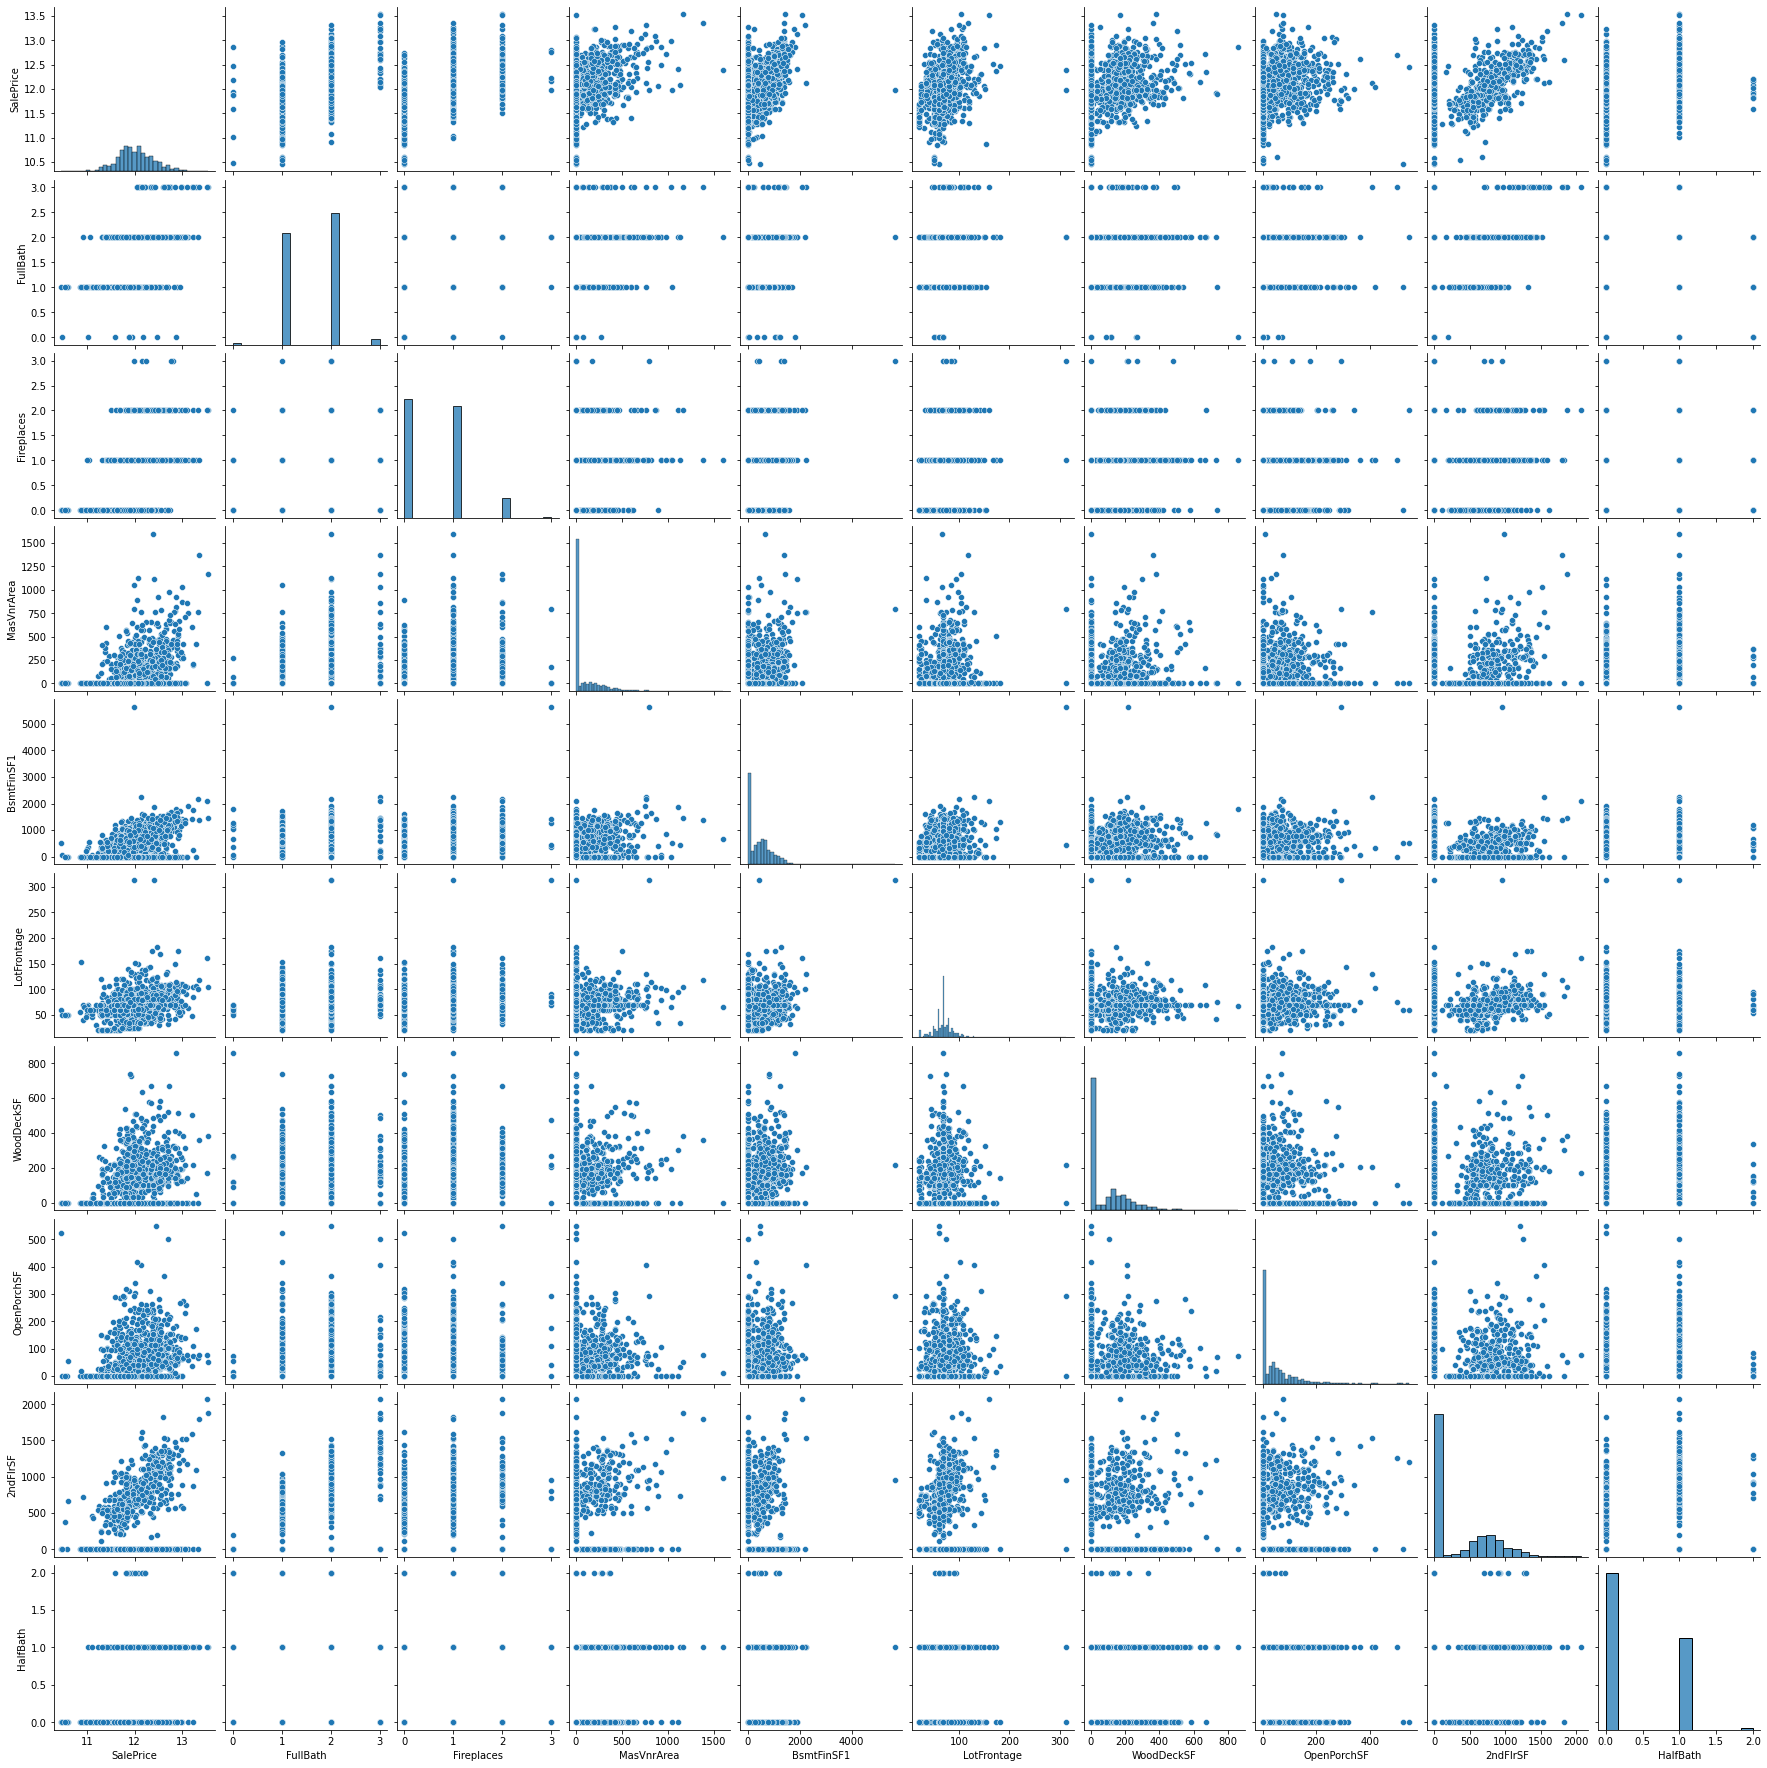

In [903]:
cols1 = ['SalePrice','FullBath','Fireplaces','MasVnrArea','BsmtFinSF1','LotFrontage','WoodDeckSF','OpenPorchSF','2ndFlrSF','HalfBath']
sns.pairplot(houses[cols1], size = 2.5)
plt.show()

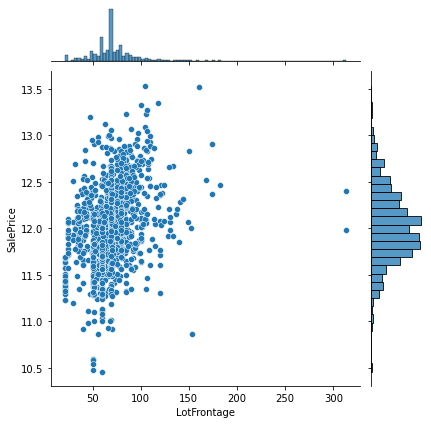

In [904]:
#Analyse few numerical variables
sns.jointplot(x='LotFrontage', y='SalePrice', data=houses)
plt.show()

- Since the dataset is small, it is not advisable to remove outliers. Hence, we are just analysing the data

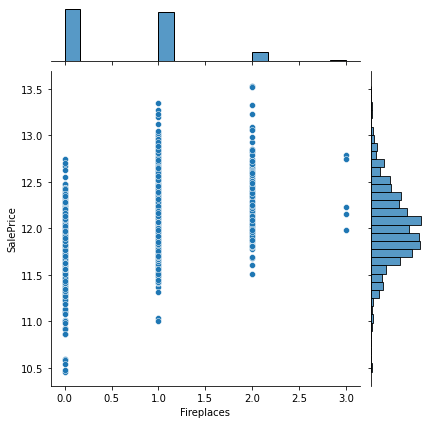

In [905]:
sns.jointplot(x='Fireplaces', y='SalePrice', data=houses)
plt.show()

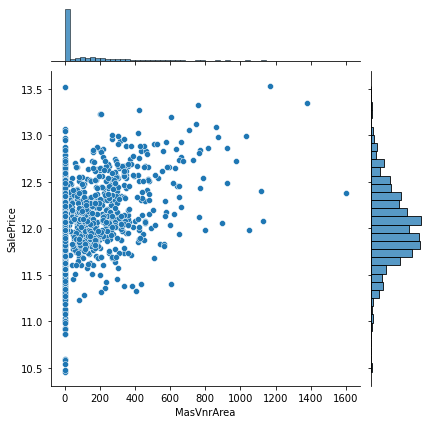

In [906]:
sns.jointplot(x='MasVnrArea', y='SalePrice', data=houses)
plt.show()

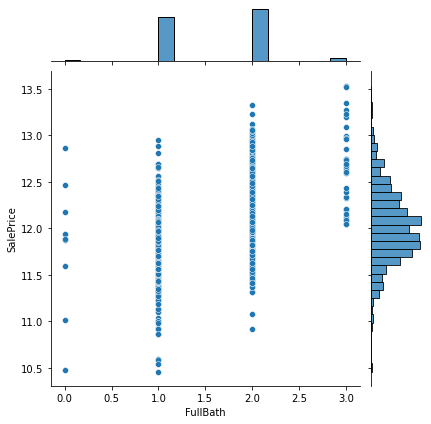

In [907]:
sns.jointplot(x='FullBath', y='SalePrice', data=houses)
plt.show()

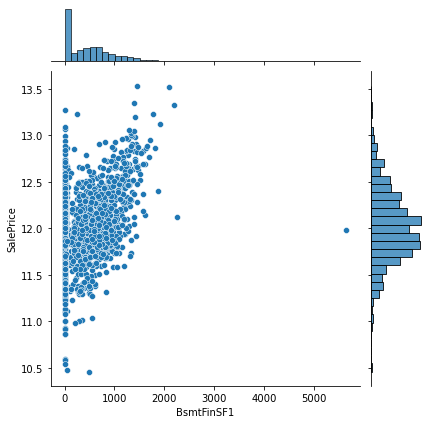

In [908]:
sns.jointplot(x='BsmtFinSF1', y='SalePrice', data=houses)
plt.show()

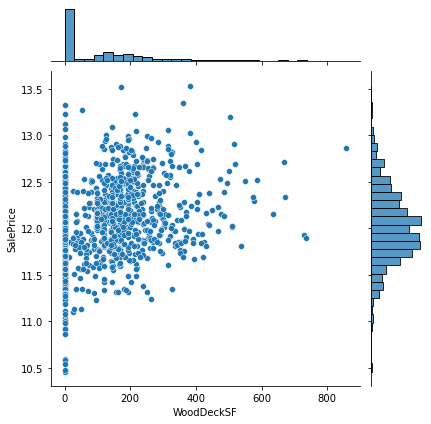

In [909]:
sns.jointplot(x='WoodDeckSF', y='SalePrice', data=houses)
plt.show()

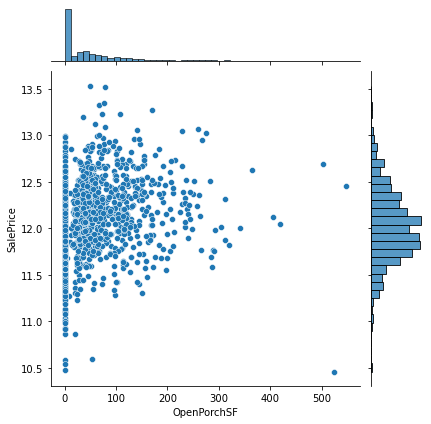

In [910]:
sns.jointplot(x='OpenPorchSF', y='SalePrice', data=houses)
plt.show()

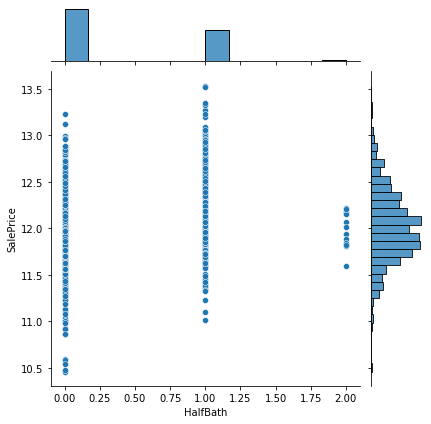

In [911]:
sns.jointplot(x='HalfBath', y='SalePrice', data=houses)
plt.show()

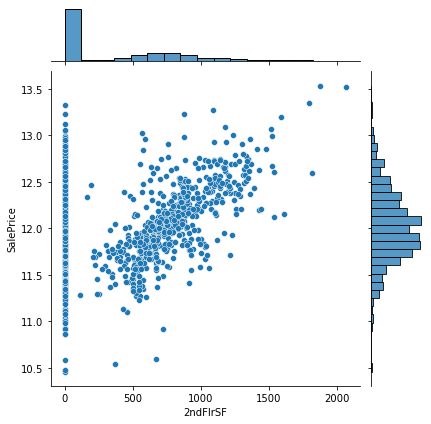

In [912]:
sns.jointplot(x='2ndFlrSF', y='SalePrice', data=houses)
plt.show()

In [913]:
houses_categorical = houses.select_dtypes(include='object').columns
houses_categorical

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [914]:
#Create dummies for categorical variables

#MSSubClass variable - we can see that the type of dwelling are represented by their relevant code, we are combining the lower number of counts to an unique code call 100.
houses = houses.replace({'MSSubClass': {40:'Other', 180:'Other',45:'Other', 75:'Other',85:'Other',190:'Other',90:'Other',80:'Other',70:'Other',160:'Other',30:'Other'}})
# Creating dummy variable
ms = pd.get_dummies(houses['MSSubClass'], prefix = 'MSSubClass')
# Dropping Other column
ms = ms.drop('MSSubClass_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, ms], axis=1)
# Dropping original variable
houses = houses.drop('MSSubClass', axis=1)

#MSZoning - To reduce the number of variables for model building, hence we are customising the variables
houses = houses.replace({'MSZoning': {'C (all)':'Other', 'RH':'Other', 'FV':'Other'}})
# Creating dummy variable
mz = pd.get_dummies(houses['MSZoning'], prefix = 'MSZoning')
# Dropping MSZoning_Other column
mz = mz.drop('MSZoning_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, mz], axis=1)
# Dropping original variable
houses = houses.drop('MSZoning', axis=1)

#LotShape
houses = houses.replace({'LotShape': {'IR2':'Other', 'IR3':'Other'}})
# Creating dummy variable
ls = pd.get_dummies(houses['LotShape'], prefix = 'LotShape')
# Dropping Other column
ls = ls.drop('LotShape_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, ls], axis=1)
# Dropping original variable
houses = houses.drop('LotShape', axis=1)

#LotConfig
houses = houses.replace({'LotConfig': {'CulDSac':'Other', 'FR2':'Other', 'FR3':'Other'}})
# Creating dummy variable
lc = pd.get_dummies(houses['LotConfig'], prefix = 'LotConfig')
# Dropping Other column
lc = lc.drop('LotConfig_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, lc], axis=1)
# Dropping original variable
houses = houses.drop('LotConfig', axis=1)

#Neighborhood
houses = houses.replace({'Neighborhood': {'Blueste':'Other', 'NPkVill':'Other', 'Veenker':'Other', 'BrDale':'Other', 'Blmngtn':'Other','MeadowV':'Other', 'SWISU':'Other', 'StoneBr':'Other', 'ClearCr':'Other','IDOTRR':'Other', 'Timber':'Other', 'NoRidge':'Other', 'Mitchel':'Other'}})
# Creating dummy variable
nh = pd.get_dummies(houses['Neighborhood'], prefix = 'Neighborhood')
# Dropping Other column
nh = nh.drop('Neighborhood_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, nh], axis=1)
# Dropping original variable
houses = houses.drop('Neighborhood', axis=1)

#Condition1
houses = houses.replace({'Condition1': {'RRNe':'Other', 'RRNn':'Other', 'PosA':'Other', 'RRAe':'Other', 'PosN':'Other','RRAn':'Other', 'Artery':'Other'}})
# Creating dummy variable
co = pd.get_dummies(houses['Condition1'], prefix = 'Condition1')
# Dropping Other column
co = co.drop('Condition1_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, co], axis=1)
# Dropping original variable
houses = houses.drop('Condition1', axis=1)

#HouseStyle
houses = houses.replace({'HouseStyle': {'2.5Fin':'Other', '2.5Unf':'Other', '1.5Unf':'Other', 'SFoyer':'Other', 'SLvl':'Other'}})    
# Creating dummy variable
hs = pd.get_dummies(houses['HouseStyle'], prefix = 'HouseStyle')
# Dropping Other column
hs = hs.drop('HouseStyle_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, hs], axis=1)
# Dropping original variable
houses = houses.drop('HouseStyle', axis=1)

#OverallQual
houses = houses.replace({'OverallQual': {1:'Other', 2:'Other', 10:'Other', 3:'Other', 9:'Other'}})
# Creating dummy variable
oq = pd.get_dummies(houses['OverallQual'], prefix = 'OverallQual')
# Dropping Other column
oq = oq.drop('OverallQual_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, oq], axis=1)
# Dropping original variable
houses = houses.drop('OverallQual', axis=1)

#OverallCond
houses = houses.replace({'OverallCond': {1:'Other', 2:'Other', 9:'Other', 3:'Other', 4:'Other'}})
# Creating dummy variable
oc = pd.get_dummies(houses['OverallCond'], prefix = 'OverallCond')
# Dropping Other column
oc = oc.drop('OverallCond_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, oc], axis=1)
# Dropping original variable
houses = houses.drop('OverallCond', axis=1)

#RoofStyle
houses = houses.replace({'RoofStyle': {'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other'}})
# Creating dummy variable
rs = pd.get_dummies(houses['RoofStyle'], prefix = 'RoofStyle')
# Dropping Other column
rs = rs.drop('RoofStyle_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, rs], axis=1)
# Dropping original variable
houses = houses.drop('RoofStyle', axis=1)

#Exterior1st
houses = houses.replace({'Exterior1st': {'ImStucc':'Other', 'AsphShn':'Other', 'CBlock':'Other', 'BrkComm':'Other','Stone':'Other','AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'}})
# Creating dummy variable
ex = pd.get_dummies(houses['Exterior1st'], prefix = 'Exterior1st')
# Dropping Other column
ex = ex.drop('Exterior1st_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, ex], axis=1)
# Dropping original variable
houses = houses.drop('Exterior1st', axis=1)

#Exterior2nd
houses = houses.replace({'Exterior2nd': {'CBlock':'Other', 'AsphShn':'Other', 'Stone':'Other', 'Brk Cmn':'Other','ImStucc':'Other','AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'}})
# Creating dummy variable
ex2 = pd.get_dummies(houses['Exterior2nd'], prefix = 'Exterior2nd')
# Dropping Other column
ex2 = ex2.drop('Exterior2nd_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, ex2], axis=1)
# Dropping original variable
houses = houses.drop('Exterior2nd', axis=1)

#MasVnrType
# Creating dummy variable
mv = pd.get_dummies(houses['MasVnrType'], prefix = 'MasVnrType')
# Dropping Other column
mv = mv.drop('MasVnrType_BrkCmn', axis=1)
# Adding result to master houses
houses = pd.concat([houses, mv], axis=1)
# Dropping original variable
houses = houses.drop('MasVnrType', axis=1)

#ExterQual
houses = houses.replace({'ExterQual': {'Fa':'Other', 'Ex':'Other'}})
# Creating dummy variable
exq = pd.get_dummies(houses['ExterQual'], prefix = 'ExterQual')
# Dropping Other column
exq = exq.drop('ExterQual_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, exq], axis=1)
# Dropping original variable
houses = houses.drop('ExterQual', axis=1)

#Foundation
houses = houses.replace({'Foundation': {'Wood':'Other', 'Stone':'Other','Slab':'Other'}})
# Creating dummy variable
fo = pd.get_dummies(houses['Foundation'], prefix = 'Foundation')
# Dropping Other column
fo = fo.drop('Foundation_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, fo], axis=1)
# Dropping original variable
houses = houses.drop('Foundation', axis=1)

#BsmtQual
houses = houses.replace({'BsmtQual': {'Fa':'Other', 'None':'Other'}})
# Creating dummy variable
bq = pd.get_dummies(houses['BsmtQual'], prefix = 'BsmtQual')
# Dropping Other column
bq = bq.drop('BsmtQual_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, bq], axis=1)
# Dropping original variable
houses = houses.drop('BsmtQual', axis=1)

#BsmtExposure
# Creating dummy variable
be = pd.get_dummies(houses['BsmtExposure'], prefix = 'BsmtExposure')
# Dropping Other column
be = be.drop('BsmtExposure_None', axis=1)
# Adding result to master houses
houses = pd.concat([houses, be], axis=1)
# Dropping original variable
houses = houses.drop('BsmtExposure', axis=1)

#BsmtFinType1
# Creating dummy variable
bf = pd.get_dummies(houses['BsmtFinType1'], prefix = 'BsmtFinType1')
# Dropping Other column
bf = bf.drop('BsmtFinType1_None', axis=1)
# Adding result to master houses
houses = pd.concat([houses, bf], axis=1)
# Dropping original variable
houses = houses.drop('BsmtFinType1', axis=1)

#HeatingQC
houses = houses.replace({'HeatingQC': {'Fa':'Other', 'Po':'Other'}})
# Creating dummy variable
hc = pd.get_dummies(houses['HeatingQC'], prefix = 'HeatingQC')
# Dropping Other column
hc = hc.drop('HeatingQC_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, hc], axis=1)
# Dropping original variable
houses = houses.drop('HeatingQC', axis=1)

#KitchenQual
houses = houses.replace({'KitchenQual': {'Fa':'Other', 'Ex':'Other'}})
# Creating dummy variable
kq = pd.get_dummies(houses['KitchenQual'], prefix = 'KitchenQual')
# Dropping Other column
kq = kq.drop('KitchenQual_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, kq], axis=1)
# Dropping original variable
houses = houses.drop('KitchenQual', axis=1)

#FireplaceQu
houses = houses.replace({'FireplaceQu': {'Fa':'Other', 'Ex':'Other','Po':'Other'}})
# Creating dummy variable
fq = pd.get_dummies(houses['FireplaceQu'], prefix = 'FireplaceQu')
# Dropping Other column
fq = fq.drop('FireplaceQu_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, fq], axis=1)
# Dropping original variable
houses = houses.drop('FireplaceQu', axis=1)

#GarageType
houses = houses.replace({'GarageType': {'2Types':'Other', 'CarPort':'Other','Basment':'Other'}})
# Creating dummy variable
gt = pd.get_dummies(houses['GarageType'], prefix = 'GarageType')
# Dropping Other column
gt = gt.drop('GarageType_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, gt], axis=1)
# Dropping original variable
houses = houses.drop('GarageType', axis=1)

#GarageFinish
# Creating dummy variable
gf = pd.get_dummies(houses['GarageFinish'], prefix = 'GarageFinish')
# Dropping Other column
gf = gf.drop('GarageFinish_None', axis=1)
# Adding result to master houses
houses = pd.concat([houses, gf], axis=1)
# Dropping original variable
houses = houses.drop('GarageFinish', axis=1)

#SaleCondition
houses = houses.replace({'SaleCondition': {'AdjLand':'Other', 'Alloca':'Other','Family':'Other'}})
# Creating dummy variable
se = pd.get_dummies(houses['SaleCondition'], prefix = 'SaleCondition')
# Dropping Other column
se = se.drop('SaleCondition_Other', axis=1)
# Adding result to master houses
houses = pd.concat([houses, se], axis=1)
# Dropping original variable
houses = houses.drop('SaleCondition', axis=1)

In [915]:
houses.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 110 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    LotFrontage            float64
 1    LotArea                int64  
 2    MasVnrArea             float64
 3    BsmtFinSF1             int64  
 4    BsmtFinSF2             int64  
 5    BsmtUnfSF              int64  
 6    2ndFlrSF               int64  
 7    LowQualFinSF           int64  
 8    BsmtFullBath           int64  
 9    BsmtHalfBath           int64  
 10   FullBath               int64  
 11   HalfBath               int64  
 12   BedroomAbvGr           int64  
 13   KitchenAbvGr           int64  
 14   Fireplaces             int64  
 15   WoodDeckSF             int64  
 16   OpenPorchSF            int64  
 17   EnclosedPorch          int64  
 18   3SsnPorch              int64  
 19   ScreenPorch            int64  
 20   PoolArea               int64  
 21   SalePrice              float64
 22 

In [916]:
houses.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,AgeOfHouse,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,854,0,1,0,2,1,3,1,0,0,61,0,0,0,0,12.247694,5,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
1,80.0,9600,0.0,978,0,284,0,0,0,1,2,0,3,1,1,298,0,0,0,0,0,12.109011,31,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0
2,68.0,11250,162.0,486,0,434,866,0,1,0,2,1,3,1,1,0,42,0,0,0,0,12.317167,7,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,0,1,0,1,0,3,1,1,0,35,272,0,0,0,11.849398,91,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0
4,84.0,14260,350.0,655,0,490,1053,0,1,0,2,1,4,1,1,192,84,0,0,0,0,12.429216,8,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0


In [917]:
houses.shape

(1460, 110)

#### Split the dataset in to train set and test set

In [918]:
#Splitting the data into train set and test set
houses_train,houses_test = train_test_split(houses, train_size=0.7, test_size=0.3, random_state=100)

In [919]:
print(houses_train.shape)
print(houses_test.shape)

(1021, 110)
(438, 110)


In [920]:
# Apply Standardscaler() to all the columns except the 'categorical' and 'dummy' variables
# Use Normalized scaler to scale
scaler = MinMaxScaler()

# Fit and transform training set only
num_var = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'AgeOfHouse']
houses_train[num_var] = scaler.fit_transform(houses_train[num_var])
houses_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,AgeOfHouse,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
210,0.157534,0.019306,0.00,0.082920,0.0,0.169521,0.000000,0.0,0.333333,0.0,0.333333,0.0,0.250,0.0,0.000000,0.000000,0.000000,0.173913,0.0,0.0,0.0,11.492723,0.610294,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
318,0.236301,0.039403,0.16,0.174876,0.0,0.154110,0.616949,0.0,0.333333,0.0,0.666667,0.5,0.500,0.0,0.333333,0.396733,0.114723,0.260870,0.0,0.0,0.0,12.468437,0.117647,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
239,0.106164,0.033981,0.00,0.016655,0.0,0.274401,0.333656,0.0,0.000000,0.0,0.333333,0.5,0.375,0.0,0.333333,0.000000,0.267686,0.000000,0.0,0.0,0.0,11.635143,0.477941,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
986,0.130137,0.017931,0.00,0.000000,0.0,0.207620,0.307022,0.0,0.000000,0.0,0.333333,0.0,0.250,0.0,0.000000,0.459743,0.000000,0.000000,0.0,0.0,0.0,11.669929,0.705882,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0
1416,0.133562,0.046139,0.00,0.000000,0.0,0.332620,0.505569,0.0,0.000000,0.0,0.666667,0.0,0.500,0.5,0.000000,0.000000,0.000000,0.206522,0.0,0.0,0.0,11.715866,0.919118,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0


In [921]:
houses_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,AgeOfHouse,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.166249,0.042143,0.065306,0.079337,0.033980,0.241388,0.165943,0.011649,0.146588,0.029873,0.522037,0.188051,0.356881,0.026934,0.199151,0.107894,0.089690,0.042275,0.007756,0.037559,0.003318,12.022188,0.268883,0.358472,0.100881,0.195886,0.064643,0.785504,0.150833,0.326151,0.634672,0.191969,0.711068,0.038198,0.098923,0.031342,0.075416,0.051910,0.151812,0.045054,0.057786,0.077375,0.047992,0.044074,0.058766,0.056807,0.854065,0.108717,0.492654,0.301665,0.085211,0.271303,0.246817,0.217434,0.12047,0.570029,0.163565,0.150833,0.048972,0.795299,0.186092,0.154750,0.167483,0.073457,0.340842,0.136141,0.142997,0.163565,0.095005,0.333007,0.131244,0.302644,0.595495,0.092067,0.335945,0.620960,0.095984,0.429971,0.451518,0.085211,0.418217,0.443683,0.155730,0.098923,0.081293,0.634672,0.144956,0.109696,0.297747,0.047013,0.087169,0.285015,0.519099,0.150833,0.290891,0.406464,0.501469,0.257591,0.485798,0.202742,0.588639,0.063663,0.269344,0.056807,0.244858,0

In [922]:
# Variables more than 0.70 correlations 
c = houses_train.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
houses_corr = pd.DataFrame(so)
#df_corr.columns = ['correlations']
print(houses_corr[(houses_corr[0] < 1) & (houses_corr[0] > 0.7)])

                                                0
Exterior2nd_MetalSd Exterior1st_MetalSd  0.978826
Exterior1st_MetalSd Exterior2nd_MetalSd  0.978826
Exterior1st_VinylSd Exterior2nd_VinylSd  0.973847
Exterior2nd_VinylSd Exterior1st_VinylSd  0.973847
RoofStyle_Gable     RoofStyle_Hip        0.942500
RoofStyle_Hip       RoofStyle_Gable      0.942500
MSSubClass_50       HouseStyle_1.5Fin    0.927742
HouseStyle_1.5Fin   MSSubClass_50        0.927742
LotShape_IR1        LotShape_Reg         0.916982
LotShape_Reg        LotShape_IR1         0.916982
ExterQual_Gd        ExterQual_TA         0.910377
ExterQual_TA        ExterQual_Gd         0.910377
FireplaceQu_None    Fireplaces           0.899500
Fireplaces          FireplaceQu_None     0.899500
Exterior1st_Wd Sdng Exterior2nd_Wd Sdng  0.886040
Exterior2nd_Wd Sdng Exterior1st_Wd Sdng  0.886040
Exterior2nd_HdBoard Exterior1st_HdBoard  0.869566
Exterior1st_HdBoard Exterior2nd_HdBoard  0.869566
KitchenQual_TA      KitchenQual_Gd       0.829973


In [923]:
#Drop the variables which are highly correlated
houses_train.drop(['Exterior1st_MetalSd','Exterior2nd_VinylSd','RoofStyle_Gable','MSSubClass_50','LotShape_IR1','ExterQual_TA','FireplaceQu_None','Exterior2nd_Wd Sdng','Exterior1st_HdBoard','KitchenQual_TA','HouseStyle_2Story','MSZoning_RL','MasVnrType_None','Foundation_CBlock','HouseStyle_1Story','LotConfig_Inside','BsmtQual_TA','MSSubClass_20','Exterior1st_Plywood','GarageType_Detchd'],axis=1,inplace=True)
houses_train.shape

(1021, 90)

### Model Building

In [924]:
#Dividing into X and y sets for model building for train set
y_train = houses_train.pop('SalePrice')
X_train = houses_train

In [925]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'AgeOfHouse', 'MSSubClass_60',
       'MSSubClass_120', 'MSZoning_RM', 'LotShape_Reg', 'LotConfig_Corner',
       'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Condition1_Feedr', 'Condition1_Norm', 'HouseStyle_1.5Fin',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'RoofSty

In [926]:
y_train.head()

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
Name: SalePrice, dtype: float64

In [927]:
# Scale the test set variables with min-max scaler
# We don't fit scaler on the test set. We only transform the test set.
houses_test[num_var] = scaler.transform(houses_test[num_var]) 
houses_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,AgeOfHouse,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.035192,0.00000,0.109142,0.0,0.106164,0.000000,0.0,0.000000,0.0,0.333333,0.0,0.375,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,11.699405,0.264706,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
57,0.232877,0.047566,0.00000,0.000000,0.0,0.368151,0.416465,0.0,0.000000,0.0,0.666667,0.5,0.375,0.0,0.000000,0.000000,0.133843,0.0,0.0,0.0,0.000000,12.188418,0.014706,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
780,0.143836,0.029930,0.02375,0.000000,0.0,0.529538,0.000000,0.0,0.000000,0.0,0.666667,0.0,0.375,0.0,0.333333,0.256709,0.040153,0.0,0.0,0.0,0.000000,12.078239,0.088235,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0
382,0.198630,0.036338,0.00000,0.000000,0.0,0.401969,0.415496,0.0,0.000000,0.0,0.666667,0.5,0.375,0.0,0.000000,0.168028,0.101338,0.0,0.0,0.0,0.000000,12.271392,0.007353,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
1170,0.188356,0.039309,0.00000,0.092488,0.0,0.245719,0.000000,0.0,0.333333,0.0,0.333333,0.0,0.375,0.0,0.333333,0.236873,0.000000,0.0,0.0,0.0,0.888889,12.049419,0.227941,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0


In [928]:
houses_test.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,AgeOfHouse,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.169716,0.042633,0.062596,0.076725,0.026057,0.246481,0.172315,0.010675,0.130137,0.026256,0.520548,0.198630,0.361587,0.014840,0.216134,0.114582,0.087749,0.034027,0.004292,0.046682,0.006458,12.027294,0.268819,0.388128,0.093607,0.223744,0.047945,0.794521,0.146119,0.342466,0.632420,0.152968,0.744292,0.043379,0.111872,0.043379,0.052511,0.059361,0.159817,0.061644,0.041096,0.077626,0.057078,0.031963,0.059361,0.052511,0.883562,0.098174,0.509132,0.310502,0.066210,0.273973,0.278539,0.219178,0.102740,0.543379,0.194064,0.116438,0.050228,0.748858,0.219178,0.146119,0.109589,0.075342,0.381279,0.152968,0.139269,0.105023,0.102740,0.374429,0.143836,0.310502,0.600457,0.077626,0.328767,0.621005,0.109589,0.445205,0.422374,0.077626,0.433790,0.447489,0.139269,0.075342,0.070776,0.696347,0.164384,0.082192,0.257991,0.059361,0.100457,0.317352,0.479452,0.198630,0.299087,0.390411,0.506849,0.267123,0.442922,0.239726,0.611872,0.052511,0.255708,0.052511,0.232877,0.315068,0.399543,0.063927,0.808219,0.102740
std,0.075051,0.043013,0.102883,0.077114,0.092662,0.182468,0.2128

In [929]:
#Dividing into X and y sets for model building for test set
y_test = houses_test.pop('SalePrice')
X_test = houses_test

In [930]:
# Retaining the columns of X_train to X_test
X_test = X_test[X_train.columns]
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AgeOfHouse,MSSubClass_60,MSSubClass_120,MSZoning_RM,LotShape_Reg,LotConfig_Corner,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Hip,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Gd,Foundation_BrkTil,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,FireplaceQu_Gd,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.035192,0.00000,0.109142,0.0,0.106164,0.000000,0.0,0.000000,0.0,0.333333,0.0,0.375,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.264706,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
57,0.232877,0.047566,0.00000,0.000000,0.0,0.368151,0.416465,0.0,0.000000,0.0,0.666667,0.5,0.375,0.0,0.000000,0.000000,0.133843,0.0,0.0,0.0,0.000000,0.014706,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
780,0.143836,0.029930,0.02375,0.000000,0.0,0.529538,0.000000,0.0,0.000000,0.0,0.666667,0.0,0.375,0.0,0.333333,0.256709,0.040153,0.0,0.0,0.0,0.000000,0.088235,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0
382,0.198630,0.036338,0.00000,0.000000,0.0,0.401969,0.415496,0.0,0.000000,0.0,0.666667,0.5,0.375,0.0,0.000000,0.168028,0.101338,0.0,0.0,0.0,0.000000,0.007353,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1170,0.188356,0.039309,0.00000,0.092488,0.0,0.245719,0.000000,0.0,0.333333,0.0,0.333333,0.0,0.375,0.0,0.333333,0.236873,0.000000,0.0,0.0,0.0,0.888889,0.227941,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [931]:
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AgeOfHouse,MSSubClass_60,MSSubClass_120,MSZoning_RM,LotShape_Reg,LotConfig_Corner,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Hip,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Gd,Foundation_BrkTil,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,FireplaceQu_Gd,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.035192,0.00000,0.109142,0.0,0.106164,0.000000,0.0,0.000000,0.0,0.333333,0.0,0.375,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.264706,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
57,0.232877,0.047566,0.00000,0.000000,0.0,0.368151,0.416465,0.0,0.000000,0.0,0.666667,0.5,0.375,0.0,0.000000,0.000000,0.133843,0.0,0.0,0.0,0.000000,0.014706,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
780,0.143836,0.029930,0.02375,0.000000,0.0,0.529538,0.000000,0.0,0.000000,0.0,0.666667,0.0,0.375,0.0,0.333333,0.256709,0.040153,0.0,0.0,0.0,0.000000,0.088235,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0
382,0.198630,0.036338,0.00000,0.000000,0.0,0.401969,0.415496,0.0,0.000000,0.0,0.666667,0.5,0.375,0.0,0.000000,0.168028,0.101338,0.0,0.0,0.0,0.000000,0.007353,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1170,0.188356,0.039309,0.00000,0.092488,0.0,0.245719,0.000000,0.0,0.333333,0.0,0.333333,0.0,0.375,0.0,0.333333,0.236873,0.000000,0.0,0.0,0.0,0.888889,0.227941,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [932]:
y_test.head()

1436    11.699405
57      12.188418
780     12.078239
382     12.271392
1170    12.049419
Name: SalePrice, dtype: float64

In [933]:
#Perform Linear regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [934]:
# Print the coefficients and intercept
print('Intercepts are:',lm.intercept_)
print('Coefficients are:',lm.coef_)

Intercepts are: 728525197265.0122
Coefficients are: [ 7.20817800e-03  4.39856196e-01 -6.49632439e-03  1.05019613e+00
  3.13293613e-01  5.27896450e-01  4.43879868e-01  4.23771066e-02
  1.79532914e-01  7.32834982e-02  2.28898403e-01  8.97987959e-02
  2.76038669e-01 -1.35423271e-01  1.53220919e-01  1.47223527e-01
 -1.33845056e-02  9.75829990e-02  1.45160893e-01  1.00117100e-01
 -3.20281183e-01 -2.40555810e-01 -8.48553327e-02 -2.95985199e-02
 -8.45560347e-02 -1.05960133e-02  1.80416678e-03  7.27984055e-02
  8.44260761e-03  1.67497090e-01 -8.66039877e-02 -3.70661160e-02
  2.43060325e-02  2.64092114e-02  1.14986425e-01  4.45678075e-02
 -6.87171663e-03  2.35960963e-02  8.14200565e-02 -1.31563662e-02
  3.92146634e-02 -6.22992236e-03 -1.19977620e-01 -9.15441193e-02
 -7.64592012e-02 -1.80809313e-02  9.07769533e-02  4.30881349e-02
  9.35707847e-02  1.53169491e-01  1.49111991e-01  2.49155321e-02
  5.26571908e-02  1.93518411e-02  2.93323111e-02  2.10018239e-02
  5.16415950e-02  4.36849974e-03 -3.78

In [935]:
# Predict the model with train set
y_train_pred = lm.predict(X_train)
# r2 score for the train model
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)

0.8629518231770048

In [936]:
# Fit the model with test set
y_test_pred = lm.predict(X_test)
# r2 score for the test set
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)

0.8224154469905421

- After removing the variables which are irrelevant for model building, we got the r2-score as 86% for train set and 82% for test set

In [937]:
#create a list to append all the results
metric = []

#r2-score for train set
r2_score_train = r2_score(y_train, y_train_pred)
print('Train Set r2-score: ',r2_score_train)
metric.append(r2_score_train)

#r2-score for test set
r2_score_test = r2_score(y_test, y_test_pred)
print('Test Set r2-score: ',r2_score_test)
metric.append(r2_score_test)

#rss for train set
rss1_train = np.sum(np.square(y_train - y_train_pred))
print('RSS for Train Set: ',rss1_train)
metric.append(rss1_train)

#rss for test set
rss1_test = np.sum(np.square(y_test - y_test_pred))
print('RSS for Test Set: ',rss1_test)
metric.append(rss1_test)


Train Set r2-score:  0.8629518231770048
Test Set r2-score:  0.8224154469905421
RSS for Train Set:  21.99516920136633
RSS for Test Set:  12.79826497403884


- For Linear Regression, we got r2-score for train set as 86% and r2-score for test set as 82%

### Ridge Regression

In [938]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [939]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [940]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=2)

In [941]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

#Create a list which appends the results
metric2 = []

#r2-score for train set
rid_train_r2 = r2_score(y_train, y_pred_train)
print('r2-score for train set: ',rid_train_r2)
metric2.append(rid_train_r2)

#r2-score for test set
rid_test_r2 = r2_score(y_test, y_pred_test)
print('r2-score for test set: ',rid_test_r2)
metric2.append(rid_test_r2)

#RSS for train set
rss1_train = np.sum(np.square(y_train - y_pred_train))
print('RSS for train set: ',rss1_train)
metric2.append(rss1_train)

rss2_test = np.sum(np.square(y_test - y_pred_test))
print('RSS for test set: ',rss2_test)
metric2.append(rss2_test)


r2-score for train set:  0.8574326019284321
r2-score for test set:  0.8213072542474338
RSS for train set:  22.880961395296232
RSS for test set:  12.878130841470753


- For Ridge Regression, r2-score for train set is 85% and r2-score for test set is 82%

In [942]:
# creating dataframe with model_ridge results
ridge_res = pd.DataFrame(model_cv.cv_results_)
ridge_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006401,0.001354,0.003326,0.000419,0.0001,{'alpha': 0.0001},0.863714,0.658898,0.784880,0.845499,0.856923,0.801983,0.076797,23,0.857298,0.891225,0.874535,0.862786,0.856438,0.868457,0.013088
1,0.005604,0.000797,0.003603,0.000791,0.001,{'alpha': 0.001},0.863752,0.659115,0.784868,0.845513,0.856902,0.802030,0.076721,22,0.857298,0.891225,0.874535,0.862786,0.856438,0.868457,0.013088
2,0.005402,0.000491,0.003201,0.000401,0.01,{'alpha': 0.01},0.864126,0.661248,0.784754,0.845645,0.856700,0.802495,0.075979,21,0.857295,0.891221,0.874533,0.862783,0.856436,0.868454,0.013088
3,0.005770,0.000940,0.003193,0.000977,0.05,{'alpha': 0.05},0.865540,0.669892,0.784298,0.846100,0.855856,0.804337,0.072968,20,0.857233,0.891133,0.874499,0.862726,0.856403,0.868398,0.013075
4,0.005803,0.000755,0.003370,0.000513,0.1,{'alpha': 0.1},0.866888,0.679081,0.783806,0.846490,0.854882,0.806229,0.069767,19,0.857097,0.890899,0.874420,0.862608,0.856327,0.868270,0.013034


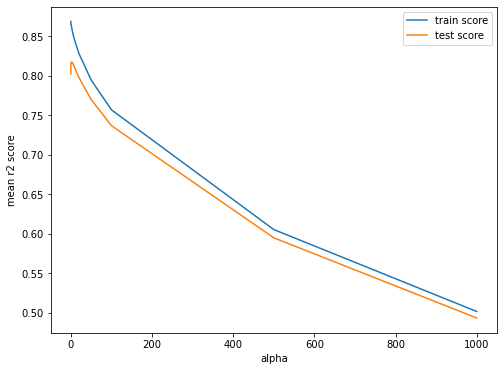

In [943]:
#Plotting the mean of the train and the test results
# Converting the 'param_alpha' datatype from object to int
ridge_res['param_alpha'] = ridge_res['param_alpha'].astype('int32')

# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_res['param_alpha'], ridge_res['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_res['param_alpha'], ridge_res['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

#### Analysis of the above graph
From the above graph we can see that with very lower value of alpha, the accuracy of the train and test set is the highest. Coincidentally they both are almost same.

#### Train Score
As the alpha (lambda) increases, the r2 score decreases. That means the error increases. Because the model becomes less overfitting and more generalised. At alpha= 2, the train set accuracy is highest(more than 80%).

#### Test Score
At alpha = 2 the test accuracy is highest (more than 80%).
After alpha=2, the r2 score started decreasing as the alpha is increasing. Hence, the model accuracy started dipping.


So, the optimum alpha will be 2, for which we will have a right balance between the error and the generalisation of the model for creating a simpler model.

#### Model Parameters of Ridge Regression

In [944]:
# Coefficients list
ridge_params = list(ridge.coef_)
# Inserting Y Intercept to model parameters list
ridge_params.insert(0, ridge.intercept_)
# Rounding off the coefficients
ridge_params = [round(i,3) for i in ridge_params]

cols = houses_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, ridge_params))
ridge_param_list

[('constant', 11.292),
 ('LotFrontage', 0.09),
 ('LotArea', 0.242),
 ('MasVnrArea', 0.066),
 ('BsmtFinSF1', 0.386),
 ('BsmtFinSF2', 0.155),
 ('BsmtUnfSF', 0.34),
 ('2ndFlrSF', 0.309),
 ('LowQualFinSF', 0.022),
 ('BsmtFullBath', 0.203),
 ('BsmtHalfBath', 0.065),
 ('FullBath', 0.27),
 ('HalfBath', 0.105),
 ('BedroomAbvGr', 0.264),
 ('KitchenAbvGr', -0.07),
 ('Fireplaces', 0.175),
 ('WoodDeckSF', 0.153),
 ('OpenPorchSF', 0.032),
 ('EnclosedPorch', 0.067),
 ('3SsnPorch', 0.094),
 ('ScreenPorch', 0.084),
 ('PoolArea', -0.077),
 ('AgeOfHouse', -0.172),
 ('MSSubClass_60', -0.066),
 ('MSSubClass_120', -0.045),
 ('MSZoning_RM', -0.087),
 ('LotShape_Reg', -0.018),
 ('LotConfig_Corner', 0.001),
 ('Neighborhood_BrkSide', 0.052),
 ('Neighborhood_CollgCr', -0.002),
 ('Neighborhood_Crawfor', 0.153),
 ('Neighborhood_Edwards', -0.089),
 ('Neighborhood_Gilbert', -0.06),
 ('Neighborhood_NAmes', 0.014),
 ('Neighborhood_NWAmes', 0.011),
 ('Neighborhood_NridgHt', 0.103),
 ('Neighborhood_OldTown', 0.027),
 (

#### Top 10 features of Ridge Regression

In [945]:
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':ridge_params})
(ridge_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
0,constant,11.292
4,BsmtFinSF1,0.386
6,BsmtUnfSF,0.340
7,2ndFlrSF,0.309
11,FullBath,0.270
13,BedroomAbvGr,0.264
2,LotArea,0.242
9,BsmtFullBath,0.203
15,Fireplaces,0.175
63,BsmtQual_Ex,0.156


### Lasso Regression

In [946]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [947]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [948]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [949]:
# Lasso Regression Coefficients
print(lasso.coef_)

[ 0.          0.00575666  0.          0.4605747   0.13033103  0.35704306
  0.28215142  0.          0.17486725  0.          0.27116498  0.08637072
  0.18147114 -0.01080625  0.21066646  0.12964867  0.          0.
  0.          0.03046132 -0.         -0.11055434 -0.01143106 -0.03700585
 -0.09197235 -0.02118195  0.          0.         -0.          0.11427426
 -0.09628563 -0.04458108  0.          0.          0.08866588 -0.
 -0.00421723  0.          0.03299483 -0.00095208  0.0271831   0.
 -0.09663401 -0.04791599 -0.03736826  0.0267978   0.12952287  0.
  0.04364065  0.0985009   0.08337796  0.03545412  0.01403845 -0.
  0.          0.          0.02166858  0.01210545 -0.          0.01445095
 -0.01531757  0.02562586  0.17794862  0.0121111   0.00798699  0.09457219
  0.         -0.00881129  0.0181133   0.          0.05589932  0.
 -0.00124946 -0.04322498  0.05817979  0.0239464  -0.          0.01212636
  0.02634561  0.          0.05235385  0.         -0.12423811  0.05642126
  0.01778924 -0.00772595 -

In [950]:
# creating dataframe with model_ridge results
lasso_res = pd.DataFrame(model_cv.cv_results_)
lasso_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013487,0.002062,0.003203,0.000403,0.0001,{'alpha': 0.0001},0.868900,0.683643,0.785303,0.850168,0.852357,0.808074,0.068460,2,0.856580,0.890668,0.874101,0.862008,0.855916,0.867855,0.013140
1,0.007994,0.000626,0.003203,0.000403,0.001,{'alpha': 0.001},0.863506,0.749517,0.782515,0.844047,0.821955,0.812308,0.041357,1,0.839846,0.872044,0.857680,0.845901,0.842138,0.851522,0.011959
2,0.006953,0.001017,0.002803,0.000395,0.01,{'alpha': 0.01},0.737894,0.683887,0.698952,0.736915,0.649890,0.701508,0.033344,3,0.712951,0.727326,0.728906,0.720012,0.724361,0.722711,0.005743
3,0.006003,0.002284,0.002744,0.000389,0.05,{'alpha': 0.05},0.347021,0.336580,0.325774,0.354640,0.289680,0.330739,0.022720,4,0.331320,0.338468,0.345094,0.333249,0.357347,0.341096,0.009425
4,0.005194,0.001170,0.002603,0.000806,0.1,{'alpha': 0.1},0.030407,0.015060,0.026359,0.029740,0.015022,0.023318,0.006896,5,0.041093,0.023519,0.025654,0.036150,0.026531,0.030589,0.006813


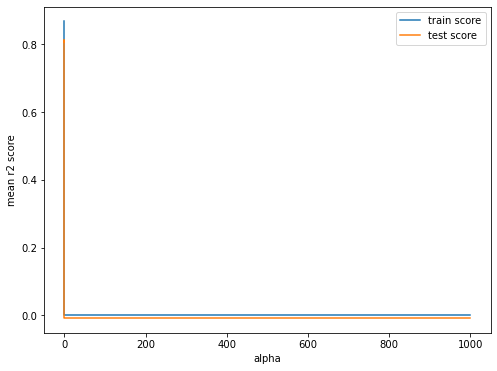

In [951]:
#Plotting the mean of the train and the test results
# Converting the 'param_alpha' datatype from object to int
lasso_res['param_alpha'] = lasso_res['param_alpha'].astype('int32')

# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_res['param_alpha'], lasso_res['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_res['param_alpha'], lasso_res['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

#### Analysis of the above graph
From the above graph we can see that with very lower value of alpha, the accuracy of the train and test set is the highest. Coincidentally they both are almost same.

#### Train Score
As the alpha (lambda) increases, the r2 score decreases. That means the error increases. Because the model becomes less overfitting and more generalised. At alpha= 0.001, the train set accuracy is highest(more than 80%).

#### Test Score
At alpha = 0.001 the test accuracy is highest (more than 80%).
After alpha=0.001, the r2 score started decreasing as the alpha is increasing. Hence, the model accuracy started dipping.


So, the optimum alpha will be 0.001, for which we will have a right balance between the error and the generalisation of the model for creating a simpler model.

#### Model Parameters of Lasso Regression

In [952]:
# Coefficients list
lasso_params = list(lasso.coef_)
# Inserting Y Intercept to model parameters list
lasso_params.insert(0, lasso.intercept_)
# Rounding off the coefficients
lasso_params = [round(i,3) for i in lasso_params]

cols = houses_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, lasso_params))
lasso_param_list

[('constant', 11.416),
 ('LotFrontage', 0.0),
 ('LotArea', 0.006),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.461),
 ('BsmtFinSF2', 0.13),
 ('BsmtUnfSF', 0.357),
 ('2ndFlrSF', 0.282),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', 0.175),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.271),
 ('HalfBath', 0.086),
 ('BedroomAbvGr', 0.181),
 ('KitchenAbvGr', -0.011),
 ('Fireplaces', 0.211),
 ('WoodDeckSF', 0.13),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.03),
 ('PoolArea', -0.0),
 ('AgeOfHouse', -0.111),
 ('MSSubClass_60', -0.011),
 ('MSSubClass_120', -0.037),
 ('MSZoning_RM', -0.092),
 ('LotShape_Reg', -0.021),
 ('LotConfig_Corner', 0.0),
 ('Neighborhood_BrkSide', 0.0),
 ('Neighborhood_CollgCr', -0.0),
 ('Neighborhood_Crawfor', 0.114),
 ('Neighborhood_Edwards', -0.096),
 ('Neighborhood_Gilbert', -0.045),
 ('Neighborhood_NAmes', 0.0),
 ('Neighborhood_NWAmes', 0.0),
 ('Neighborhood_NridgHt', 0.089),
 ('Neighborhood_OldTown', -0.0),
 ('Neighborhood_Sawyer', -0

#### Top 10 Features of Lasso Regression

In [953]:
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':lasso_params})
lasso_params_df.columns = ['Params','Coef']
lasso_params_df.head()

,Params,Coef
0,constant,11.416
1,LotFrontage,0.000
2,LotArea,0.006
3,MasVnrArea,0.000
4,BsmtFinSF1,0.461


In [954]:
# sort the coefficients in ascending order
lasso_params_df = lasso_params_df.sort_values((['Coef']), axis = 0, ascending = False)
lasso_params_df

,Params,Coef
0,constant,11.416
4,BsmtFinSF1,0.461
6,BsmtUnfSF,0.357
7,2ndFlrSF,0.282
11,FullBath,0.271
15,Fireplaces,0.211
13,BedroomAbvGr,0.181
63,BsmtQual_Ex,0.178
9,BsmtFullBath,0.175
47,OverallQual_8,0.130


In [955]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

#Create a list which appends the results
metric3 = []

#r2-score for train set
rid_train_r2 = r2_score(y_train, y_pred_train)
print('r2-score for train set: ',rid_train_r2)
metric3.append(rid_train_r2)

#r2-score for test set
rid_test_r2 = r2_score(y_test, y_pred_test)
print('r2-score for test set: ',rid_test_r2)
metric3.append(rid_test_r2)

#RSS for train set
rss1_train = np.sum(np.square(y_train - y_pred_train))
print('RSS for train set: ',rss1_train)
metric3.append(rss1_train)

rss2_test = np.sum(np.square(y_test - y_pred_test))
print('RSS for test set: ',rss2_test)
metric3.append(rss2_test)


r2-score for train set:  0.8467211963580621
r2-score for test set:  0.8082938702575581
RSS for train set:  24.600058893463128
RSS for test set:  13.815986830006388


- For Lasso Regression, we got r2-score for train set is 85% and r2-score for test set is 81%

In [956]:
# Creating a table which contain all the metrics

linear_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)'], 'Linear Regression': metric}

linear_metric = pd.DataFrame(linear_table ,columns = ['Metric', 'Linear Regression'] )

ridge_metric = pd.Series(metric2, name = 'Ridge Regression')
lasso_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([linear_metric, ridge_metric, lasso_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.862952,0.857433,0.846721
1,R2 Score (Test),0.822415,0.821307,0.808294
2,RSS (Train),21.995169,22.880961,24.600059
3,RSS (Test),12.798265,12.878131,13.815987


### Let's observe the changes in the coefficients after regularization

In [957]:
ch = pd.DataFrame(index=houses_train.columns)
ch.rows = houses_train.columns
ch['Linear'] = lm.coef_
ch['Ridge'] = ridge.coef_
ch['Lasso'] = lasso.coef_

In [958]:
#print the dataframe with the coefficients of linear regression, ridge regression and lasso regression
ch.head()

,Linear,Ridge,Lasso
LotFrontage,0.007208,0.089618,0.000000
LotArea,0.439856,0.242288,0.005757
MasVnrArea,-0.006496,0.065898,0.000000
BsmtFinSF1,1.050196,0.386327,0.460575
BsmtFinSF2,0.313294,0.155365,0.130331


In [959]:
# Choose variables whose coefficients are non-zero
lassopred = pd.DataFrame(lasso_params_df[(lasso_params_df['Coef'] != 0)])
lassopred


,Params,Coef
0,constant,11.416
4,BsmtFinSF1,0.461
6,BsmtUnfSF,0.357
7,2ndFlrSF,0.282
11,FullBath,0.271
15,Fireplaces,0.211
13,BedroomAbvGr,0.181
63,BsmtQual_Ex,0.178
9,BsmtFullBath,0.175
47,OverallQual_8,0.130


In [960]:
lassopred.shape

(62, 2)

### Observations

Though the model performance by Ridge Regression was better in terms of R2-Score values of Train and Test, it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables. It is always advisable to use simple yet robust model.


#### Features obtained by Lasso

These are few of the final features that should be selected for predicting the price of house - 

Keep a check on these predictors affecting the price of the house. The higher values of positive coeeficients suggest a high sale value. Some of those features are -
- BsmtFinSF1
- BsmtUnfSF
- 2ndFlrSF
- FullBath
- Fireplaces	
- BedroomAbvGr
- BsmtQual_Ex	
- BsmtFullBath 
- OverallQual_8
- BsmtFinSF2

The higher value of negative coefficients suggest a decrease in sale value. Some of those features are -
- GarageType_None
- AgeOfHouse
- OverallQual_4
- Neighborhood_Edwards
- MSZoning_RM
- SaleCondition_Abnorml
- OverallQual_5
- Neighborhood_Gilbert
- BsmtFinType1_Unf
- OverallQual_6

When the market value of the property is lower than the predicted sale price then it's time to buy